# Chapter 3. Linear Regression

## Lab

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

### Simple Linear Regression

In [3]:
Boston = pd.read_csv('data/Boston.csv', index_col=0)

In [4]:
Boston.head()

crim    zn  indus  chas    nox     rm   age     dis  rad  tax  ptratio  \
1  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
2  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
3  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
4  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
5  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

    black  lstat  medv  
1  396.90   4.98  24.0  
2  396.90   9.14  21.6  
3  392.83   4.03  34.7  
4  394.63   2.94  33.4  
5  396.90   5.33  36.2

Let’s try to predict **medv** using the others as predictors.

In [5]:
import statsmodels.api as sm

mod = sm.OLS(Boston.medv, sm.add_constant(Boston.lstat))
res = mod.fit()
res.summary()

/usr/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     601.6
Date:                Sat, 28 Apr 2018   Prob (F-statistic):           5.08e-88
Time:                        12:50:13   Log-Likelihood:                -1641.5
No. Observations:                 506   AIC:                             3287.
Df Residuals:                     504   BIC:                             3295.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         34.5538      0.563     61.415      0.000      33.448      35.659
lstat         -0.9500      0.039    -24.528      0.000      -1.026      -0.874
==============================================================================
Omnibus:                      137.043   Durbin-Watson:                   0.892
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              291.373
Skew:                           1.453   Prob(JB):                     5.36e-64
Kurtosis:                       5.319   Cond. No.                         29.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [6]:
res.params

const    34.553841
lstat    -0.950049
dtype: float64

Confidence interval of the coefficient estimates.

In [7]:
res.conf_int()

0          1
const  33.448457  35.659225
lstat  -1.026148  -0.873951

In [8]:
from statsmodels.sandbox.regression.predstd import wls_prediction_std

pred_res = res.get_prediction(sm.add_constant([5, 10, 15]))
pf = pred_res.summary_frame()
pf.round(4)

mean  mean_se  mean_ci_lower  mean_ci_upper  obs_ci_lower  obs_ci_upper
0  29.8036   0.4052        29.0074        30.5998       17.5657       42.0415
1  25.0533   0.2948        24.4741        25.6326       12.8276       37.2791
2  20.3031   0.2909        19.7316        20.8746        8.0777       32.5285

The `mean_ci` columns are _confidence intervals_, and `obs_ci` are _prediction intervals_.

To remember, *prediction intervals* are always wider than the 
*confidence intervals*.

Remember we are approximating $y = f(x) + \epsilon$. Thus:

- **Confidence interval**: quantify the uncertainty of the surrounding the 
    *average*.  We interpret it as 95% of the confidence intervals will contain
    the actual $f(X)$.
- **Prediction interval**: even if we knew the actual $f(X)$, how much the
    prediction would vary? This is the prediction error plus the irreducible
    error $\epsilon$. We interpret it as 95% of the prediction intervals will contain 
    $y$.


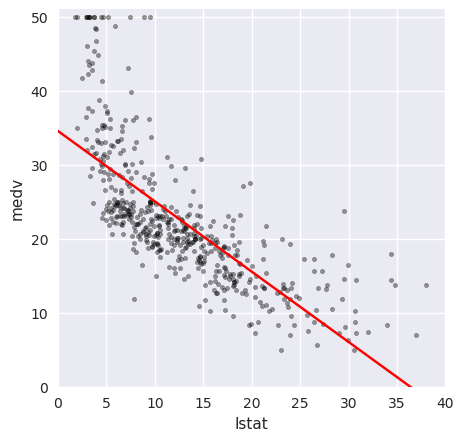

In [9]:
plt.figure(figsize=(5, 5), dpi=100)
plt.scatter(Boston.lstat, Boston.medv, alpha=0.4, color='black', s=10)
x = np.linspace(0, 40, 10)
plt.plot(x, res.predict(sm.add_constant(x)), c='red')
plt.ylim((0, 51))
plt.xlim((0, 40))
plt.xlabel('lstat')
plt.ylabel('medv');

This looks somewhat non-linear.

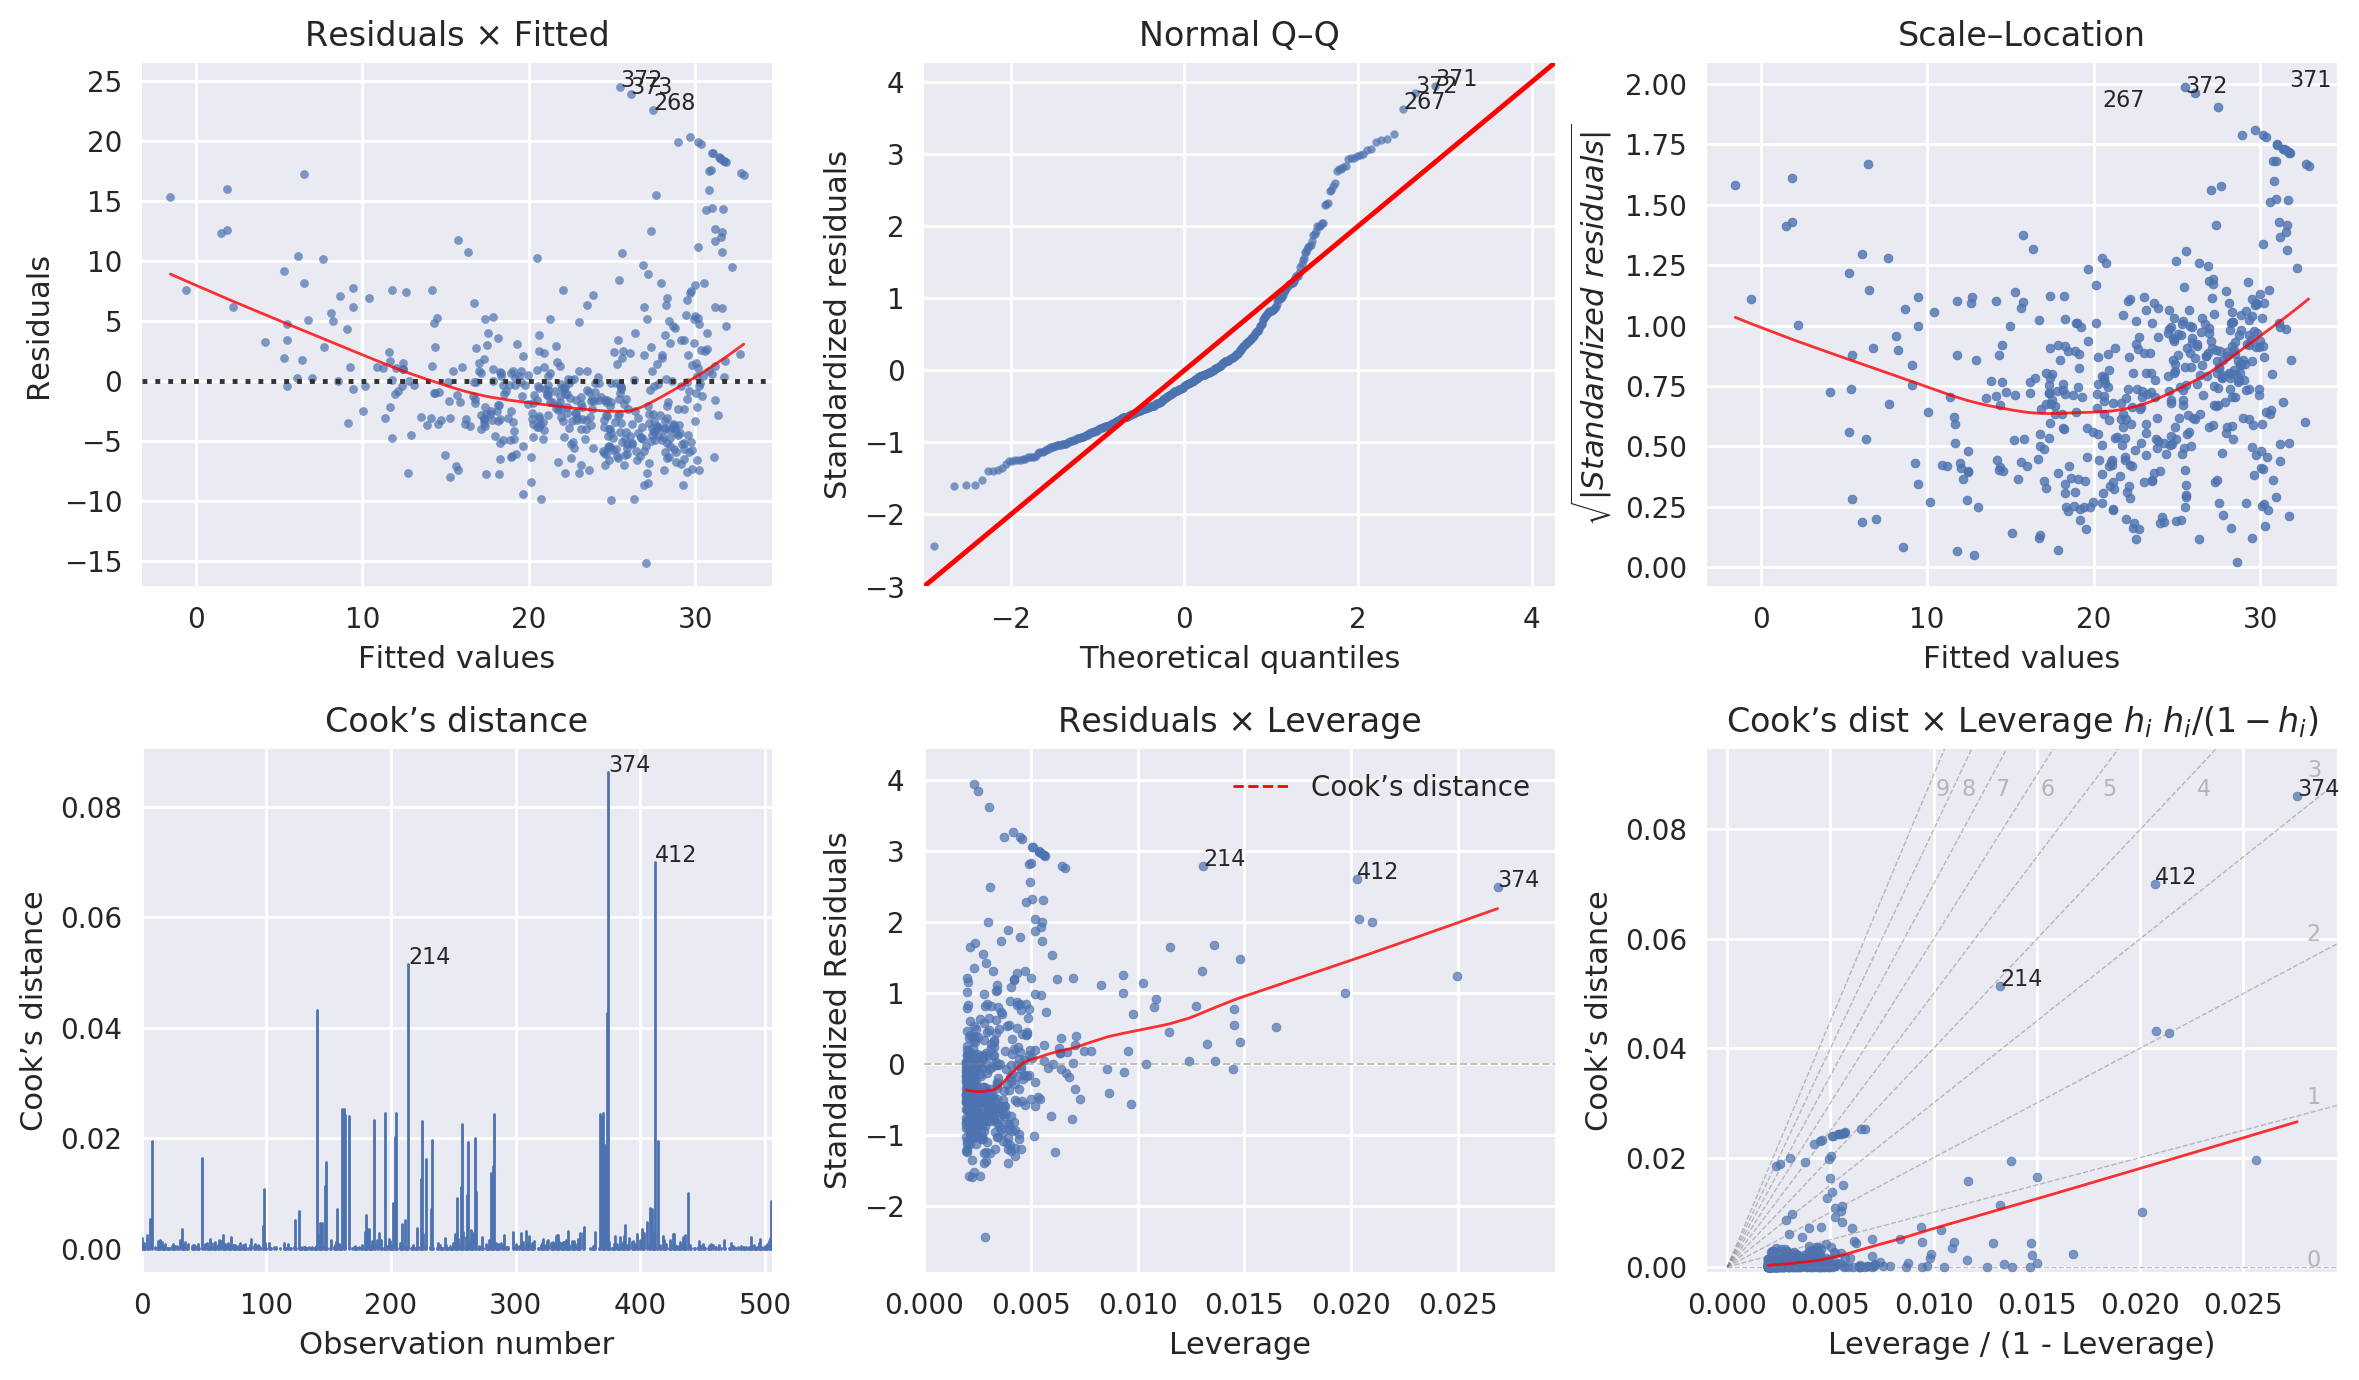

In [10]:
import diagnostics

diagnostics.lm_plot(res, Boston.medv)

- **Residuals × Fitted**: Evidence of a non-linear relationship
- **Normal Q–Q**: The Q–Q plot of the residuals shows that they are not normally distributed, otherwise would follow a straight line.
- **Scale–Location**: This plot is useful to check for homoscedasticity. In this case, the residuals show a heterocedasticity spread, because the are concentrated in some values and more spread in others.
- **Residuals × Leverage**: This plot helps find influential observations, which can be outliers. There are not visible outliers in this data.

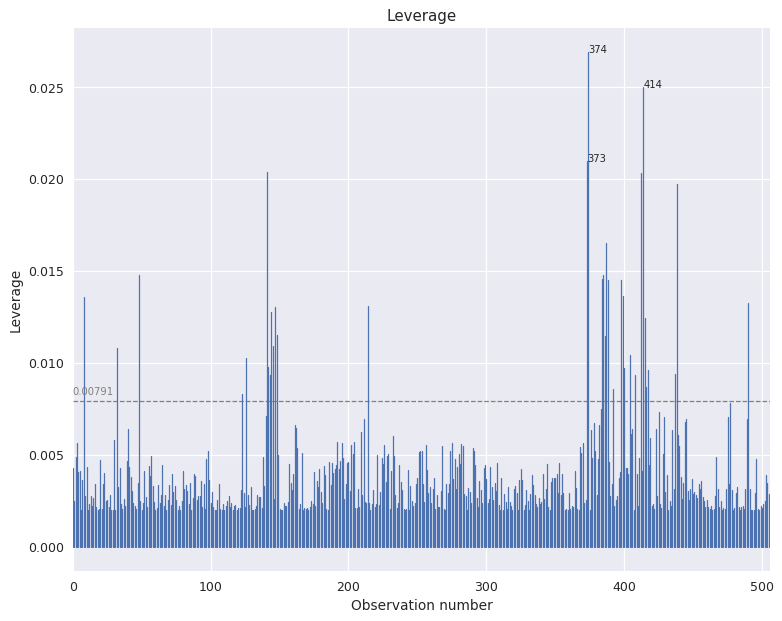

In [11]:
import diagnostics

leverage = res.get_influence().hat_matrix_diag
_, ax = plt.subplots(figsize=(10, 8), dpi=90)
diagnostics.leverage_plot(leverage, len(res.params), ax=ax)

### Multiple Linear Regression

In [12]:
import statsmodels.formula.api as smf

model = smf.ols(formula='medv ~ lstat + age', data=Boston)
res = model.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.551
Model:                            OLS   Adj. R-squared:                  0.549
Method:                 Least Squares   F-statistic:                     309.0
Date:                Sat, 28 Apr 2018   Prob (F-statistic):           2.98e-88
Time:                        12:50:20   Log-Likelihood:                -1637.5
No. Observations:                 506   AIC:                             3281.
Df Residuals:                     503   BIC:                             3294.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     33.2228      0.731     45.458      0.000      31.787      34.659
lstat         -1.0321      0.048    -21.416      0.000      -1.127      -0.937
age            0.0345      0.012      2.826      0.005       0.011       0.059
==============================================================================
Omnibus:                      124.288   Durbin-Watson:                   0.945
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              244.026
Skew:                           1.362   Prob(JB):                     1.02e-53
Kurtosis:                       5.038   Cond. No.                         201.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [13]:
features = ' + '.join([colname for colname in Boston.columns if colname != 'medv'])
model = smf.ols(formula=f'medv ~ {features}', data=Boston)
res = model.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Sat, 28 Apr 2018   Prob (F-statistic):          6.72e-135
Time:                        12:50:20   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.4595      5.103      7.144      0.000      26.432      46.487
crim          -0.1080      0.033     -3.287      0.001      -0.173      -0.043
zn             0.0464      0.014      3.382      0.001       0.019       0.073
indus          0.0206      0.061      0.334      0.738      -0.100       0.141
chas           2.6867      0.862      3.118      0.002       0.994       4.380
nox          -17.7666      3.820     -4.651      0.000     -25.272     -10.262
rm             3.8099      0.418      9.116      0.000       2.989       4.631
age            0.0007      0.013      0.052      0.958      -0.025       0.027
dis           -1.4756      0.199     -7.398      0.000      -1.867      -1.084
rad            0.3060      0.066      4.613      0.000       0.176       0.436
tax           -0.0123      0.004     -3.280      0.001      -0.020      -0.005
ptratio       -0.9527      0.131     -7.283      0.000      -1.210      -0.696
black          0.0093      0.003      3.467      0.001       0.004       0.015
lstat         -0.5248      0.051    -10.347      0.000      -0.624      -0.425
==============================================================================
Omnibus:                      178.041   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              783.126
Skew:                           1.521   Prob(JB):                    8.84e-171
Kurtosis:                       8.281   Cond. No.                     1.51e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [14]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices

features = ' + '.join([colname for colname in Boston.columns if colname != 'medv'])
y, X = dmatrices(f'medv ~ {features}', Boston, return_type='dataframe')

vif = pd.DataFrame()
vif['VIF Factor'] = [variance_inflation_factor(X.values, i)
                     for i in range(X.shape[1])]
vif['features'] = X.columns
vif.round(1)

VIF Factor   features
0        585.3  Intercept
1          1.8       crim
2          2.3         zn
3          4.0      indus
4          1.1       chas
5          4.4        nox
6          1.9         rm
7          3.1        age
8          4.0        dis
9          7.5        rad
10         9.0        tax
11         1.8    ptratio
12         1.3      black
13         2.9      lstat

Values between 5–10 should be considered to be removed.

In [15]:
features = ' + '.join([colname for colname in Boston.columns 
                       if colname not in ['medv', 'tax']])
model = smf.ols(formula=f'medv ~ {features}', data=Boston)
res = model.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.735
Model:                            OLS   Adj. R-squared:                  0.729
Method:                 Least Squares   F-statistic:                     113.9
Date:                Sat, 28 Apr 2018   Prob (F-statistic):          1.21e-133
Time:                        12:50:20   Log-Likelihood:                -1504.3
No. Observations:                 506   AIC:                             3035.
Df Residuals:                     493   BIC:                             3089.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     34.6286      5.123      6.760      0.000      24.563      44.694
crim          -0.1067      0.033     -3.216      0.001      -0.172      -0.042
zn             0.0364      0.014      2.692      0.007       0.010       0.063
indus         -0.0678      0.056     -1.214      0.225      -0.177       0.042
chas           3.0292      0.864      3.507      0.000       1.332       4.726
nox          -18.7012      3.847     -4.862      0.000     -26.259     -11.143
rm             3.9117      0.421      9.294      0.000       3.085       4.739
age           -0.0006      0.013     -0.045      0.964      -0.027       0.026
dis           -1.4883      0.201     -7.390      0.000      -1.884      -1.093
rad            0.1346      0.041      3.262      0.001       0.054       0.216
ptratio       -0.9851      0.132     -7.478      0.000      -1.244      -0.726
black          0.0095      0.003      3.521      0.000       0.004       0.015
lstat         -0.5222      0.051    -10.198      0.000      -0.623      -0.422
==============================================================================
Omnibus:                      168.699   Durbin-Watson:                   1.089
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              702.173
Skew:                           1.452   Prob(JB):                    3.35e-153
Kurtosis:                       7.987   Cond. No.                     1.01e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.01e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Interaction Terms

In [16]:
model = smf.ols(formula=f'medv ~ lstat * age', data=Boston)
res = model.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.556
Model:                            OLS   Adj. R-squared:                  0.553
Method:                 Least Squares   F-statistic:                     209.3
Date:                Sat, 28 Apr 2018   Prob (F-statistic):           4.86e-88
Time:                        12:50:20   Log-Likelihood:                -1635.0
No. Observations:                 506   AIC:                             3278.
Df Residuals:                     502   BIC:                             3295.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.0885      1.470     24.553      0.000      33.201      38.976
lstat         -1.3921      0.167     -8.313      0.000      -1.721      -1.063
age           -0.0007      0.020     -0.036      0.971      -0.040       0.038
lstat:age      0.0042      0.002      2.244      0.025       0.001       0.008
==============================================================================
Omnibus:                      135.601   Durbin-Watson:                   0.965
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              296.955
Skew:                           1.417   Prob(JB):                     3.29e-65
Kurtosis:                       5.461   Cond. No.                     6.88e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.88e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Non-linear Transformations of the Predictors

In [17]:
model = smf.ols(formula=f'medv ~ lstat + I(lstat ** 2)', data=Boston)
res = model.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.641
Model:                            OLS   Adj. R-squared:                  0.639
Method:                 Least Squares   F-statistic:                     448.5
Date:                Sat, 28 Apr 2018   Prob (F-statistic):          1.56e-112
Time:                        12:50:20   Log-Likelihood:                -1581.3
No. Observations:                 506   AIC:                             3169.
Df Residuals:                     503   BIC:                             3181.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        42.8620      0.872     49.149      0.000      41.149      44.575
lstat            -2.3328      0.124    -18.843      0.000      -2.576      -2.090
I(lstat ** 2)     0.0435      0.004     11.628      0.000       0.036       0.051
==============================================================================
Omnibus:                      107.006   Durbin-Watson:                   0.921
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              228.388
Skew:                           1.128   Prob(JB):                     2.55e-50
Kurtosis:                       5.397   Cond. No.                     1.13e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.13e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Hypothesis test. Null hypothesis is that the `lm.fit2` fits the data equally well as `lm.fit`. 
The alternative hypethesis is that the `lm.fit2` is superior.

In [18]:
model1 = smf.ols(formula=f'medv ~ lstat', data=Boston).fit()
model2 = smf.ols(formula=f'medv ~ lstat + I(lstat ** 2)', data=Boston).fit()

table = sm.stats.anova_lm(model1, model2)
table.round(1)

/usr/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/usr/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/usr/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


df_resid      ssr  df_diff  ss_diff      F  Pr(>F)
0     504.0  19472.4      0.0      NaN    NaN     NaN
1     503.0  15347.2      1.0   4125.1  135.2     0.0

The **F** is 135 with a *p* pratically zero. We reject the null hypothesis.
Thus, the **lstat**² improved a lot the model.

In [19]:
model = smf.ols(formula=f'medv ~ lstat + I(lstat**2) + I(lstat**3) + I(lstat**4) + I(lstat**5)', data=Boston)
res = model.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     214.2
Date:                Sat, 28 Apr 2018   Prob (F-statistic):          8.73e-122
Time:                        12:50:20   Log-Likelihood:                -1550.6
No. Observations:                 506   AIC:                             3113.
Df Residuals:                     500   BIC:                             3139.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        67.6997      3.604     18.783      0.000      60.618      74.781
lstat           -11.9911      1.526     -7.859      0.000     -14.989      -8.994
I(lstat ** 2)     1.2728      0.223      5.703      0.000       0.834       1.711
I(lstat ** 3)    -0.0683      0.014     -4.747      0.000      -0.097      -0.040
I(lstat ** 4)     0.0017      0.000      4.143      0.000       0.001       0.003
I(lstat ** 5) -1.632e-05   4.42e-06     -3.692      0.000    -2.5e-05   -7.63e-06
==============================================================================
Omnibus:                      144.085   Durbin-Watson:                   0.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              494.545
Skew:                           1.292   Prob(JB):                    4.08e-108
Kurtosis:                       7.096   Cond. No.                     1.37e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.37e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [20]:
model = smf.ols(formula=f'medv ~ I(np.log(rm))', data=Boston)
res = model.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.436
Model:                            OLS   Adj. R-squared:                  0.435
Method:                 Least Squares   F-statistic:                     389.3
Date:                Sat, 28 Apr 2018   Prob (F-statistic):           1.22e-64
Time:                        12:50:20   Log-Likelihood:                -1695.4
No. Observations:                 506   AIC:                             3395.
Df Residuals:                     504   BIC:                             3403.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept       -76.4878      5.028    -15.213      0.000     -86.366     -66.610
I(np.log(rm))    54.0546      2.739     19.732      0.000      48.672      59.437
==============================================================================
Omnibus:                      117.102   Durbin-Watson:                   0.681
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              584.336
Skew:                           0.916   Prob(JB):                    1.30e-127
Kurtosis:                       7.936   Cond. No.                         38.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Qualitative Predictors

In [21]:
Carseats = pd.read_csv('data/Carseats.csv')
Carseats.head()

Sales  CompPrice  Income  Advertising  Population  Price ShelveLoc  Age  \
0   9.50        138      73           11         276    120       Bad   42   
1  11.22        111      48           16         260     83      Good   65   
2  10.06        113      35           10         269     80    Medium   59   
3   7.40        117     100            4         466     97    Medium   55   
4   4.15        141      64            3         340    128       Bad   38   

   Education Urban   US  
0         17   Yes  Yes  
1         10   Yes  Yes  
2         12   Yes  Yes  
3         14   Yes  Yes  
4         13   Yes   No

In [22]:
features = '+'.join([col for col in Carseats.columns if col not in ['Sales']])
model = smf.ols(formula=f'Sales ~ {features} + Income*Advertising + Price*Age', data=Carseats).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.876
Model:                            OLS   Adj. R-squared:                  0.872
Method:                 Least Squares   F-statistic:                     210.0
Date:                Sat, 28 Apr 2018   Prob (F-statistic):          6.14e-166
Time:                        12:50:20   Log-Likelihood:                -564.67
No. Observations:                 400   AIC:                             1157.
Df Residuals:                     386   BIC:                             1213.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               6.5756      1.009      6.519      0.000       4.592       8.559
ShelveLoc[T.Good]       4.8487      0.153     31.724      0.000       4.548       5.149
ShelveLoc[T.Medium]     1.9533      0.126     15.531      0.000       1.706       2.201
Urban[T.Yes]            0.1402      0.112      1.247      0.213      -0.081       0.361
US[T.Yes]              -0.1576      0.149     -1.058      0.291      -0.450       0.135
CompPrice               0.0929      0.004     22.567      0.000       0.085       0.101
Income                  0.0109      0.003      4.183      0.000       0.006       0.016
Advertising             0.0702      0.023      3.107      0.002       0.026       0.115
Population              0.0002      0.000      0.433      0.665      -0.001       0.001
Price                  -0.1008      0.007    -13.549      0.000      -0.115      -0.086
Age                    -0.0579      0.016     -3.633      0.000      -0.089      -0.027
Education              -0.0209      0.020     -1.063      0.288      -0.059       0.018
Income:Advertising      0.0008      0.000      2.698      0.007       0.000       0.001
Price:Age               0.0001      0.000      0.801      0.424      -0.000       0.000
==============================================================================
Omnibus:                        1.281   Durbin-Watson:                   2.047
Prob(Omnibus):                  0.527   Jarque-Bera (JB):                1.147
Skew:                           0.129   Prob(JB):                        0.564
Kurtosis:                       3.050   Cond. No.                     1.31e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.31e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

To see which dummies `R` has used:

In [23]:
from patsy.contrasts import Treatment
levels = list(Carseats.ShelveLoc.unique())
contrast = Treatment().code_without_intercept(levels)
pd.DataFrame(contrast.matrix, 
             index=levels,
             columns=contrast.column_suffixes).astype(int)

[T.Good]  [T.Medium]
Bad            0           0
Good           1           0
Medium         0           1

Since **ShelveLocGood** in the regression output is positive indicates that a good
shelving location is associated with high sales (relative to a bad location).
And
**ShelveLocMedium**
has a smaller positive coefficient, indicating that a
medium shelving location leads to higher sales than a bad shelving location
but lower sales than a good shelving location.

## Applied

### Exercise 8

This question involves the use of simple linear regression on the **Auto MPG** data set. 

In [24]:
Auto = pd.read_csv('data/Auto.csv', index_col=8, na_values='?')
Auto.head()

mpg  cylinders  displacement  horsepower  weight  \
name                                                                           
chevrolet chevelle malibu  18.0          8         307.0       130.0    3504   
buick skylark 320          15.0          8         350.0       165.0    3693   
plymouth satellite         18.0          8         318.0       150.0    3436   
amc rebel sst              16.0          8         304.0       150.0    3433   
ford torino                17.0          8         302.0       140.0    3449   

                           acceleration  year  origin  
name                                                   
chevrolet chevelle malibu          12.0    70       1  
buick skylark 320                  11.5    70       1  
plymouth satellite                 11.0    70       1  
amc rebel sst                      12.0    70       1  
ford torino                        10.5    70       1

#### Exercise 8a

Use the `lm()` function to perform a simple linear regression with **mpg** as the response and 
**horsepower** as the predictor. Use the `summary()` function to print the results. 
Comment on the output.

In [25]:
model = smf.ols(formula='mpg ~ horsepower', data=Auto).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     599.7
Date:                Sat, 28 Apr 2018   Prob (F-statistic):           7.03e-81
Time:                        12:50:20   Log-Likelihood:                -1178.7
No. Observations:                 392   AIC:                             2361.
Df Residuals:                     390   BIC:                             2369.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     39.9359      0.717     55.660      0.000      38.525      41.347
horsepower    -0.1578      0.006    -24.489      0.000      -0.171      -0.145
==============================================================================
Omnibus:                       16.432   Durbin-Watson:                   0.920
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               17.305
Skew:                           0.492   Prob(JB):                     0.000175
Kurtosis:                       3.299   Cond. No.                         322.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

1. Is there a relationship between the predictor and the response?

*Answer:* Yes. An increase in **horsepower** decreases the fuel efficiency **mpg**.

2. How strong is the relationship between the predictor and the response? 

*Answer:* The p-value is near zero, indicating a strong relationship.

3. Is the relationship between the predictor and the response positive or negative? 

*Answer:* Negative, -0.158.

4. What is the predicted **mpg** associated with a horsepower of 98? What are the associated 95% conﬁdence and prediction intervals?

In [26]:
from statsmodels.sandbox.regression.predstd import wls_prediction_std

pred_res = model.get_prediction(pd.DataFrame(dict(horsepower=[98])))
pf = pred_res.summary_frame()
pf.round(4)

mean  mean_se  mean_ci_lower  mean_ci_upper  obs_ci_lower  obs_ci_upper
0  24.4671   0.2513        23.9731        24.9611       14.8094       34.1248

- Confidence interval: [23.97, 24.96]

- Prediction interval: [14.81, 34.13]

#### Exercise 10b

Plot the response and the predictor. Use the `abline()` function to display the least squares regression line.

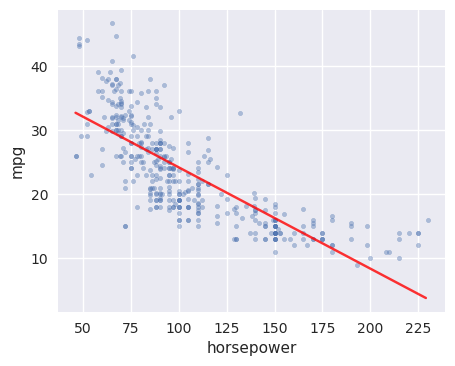

In [27]:
xmin, xmax = np.min(Auto.horsepower), np.max(Auto.horsepower)
x = pd.DataFrame(dict(horsepower=np.arange(xmin, xmax)))
y = model.predict(x)

plt.figure(figsize=(5, 4), dpi=100)
plt.scatter(Auto.horsepower, Auto.mpg, alpha=0.4, s=10)
plt.plot(x, y, color='red', alpha=0.8)
plt.xlabel('horsepower')
plt.ylabel('mpg');

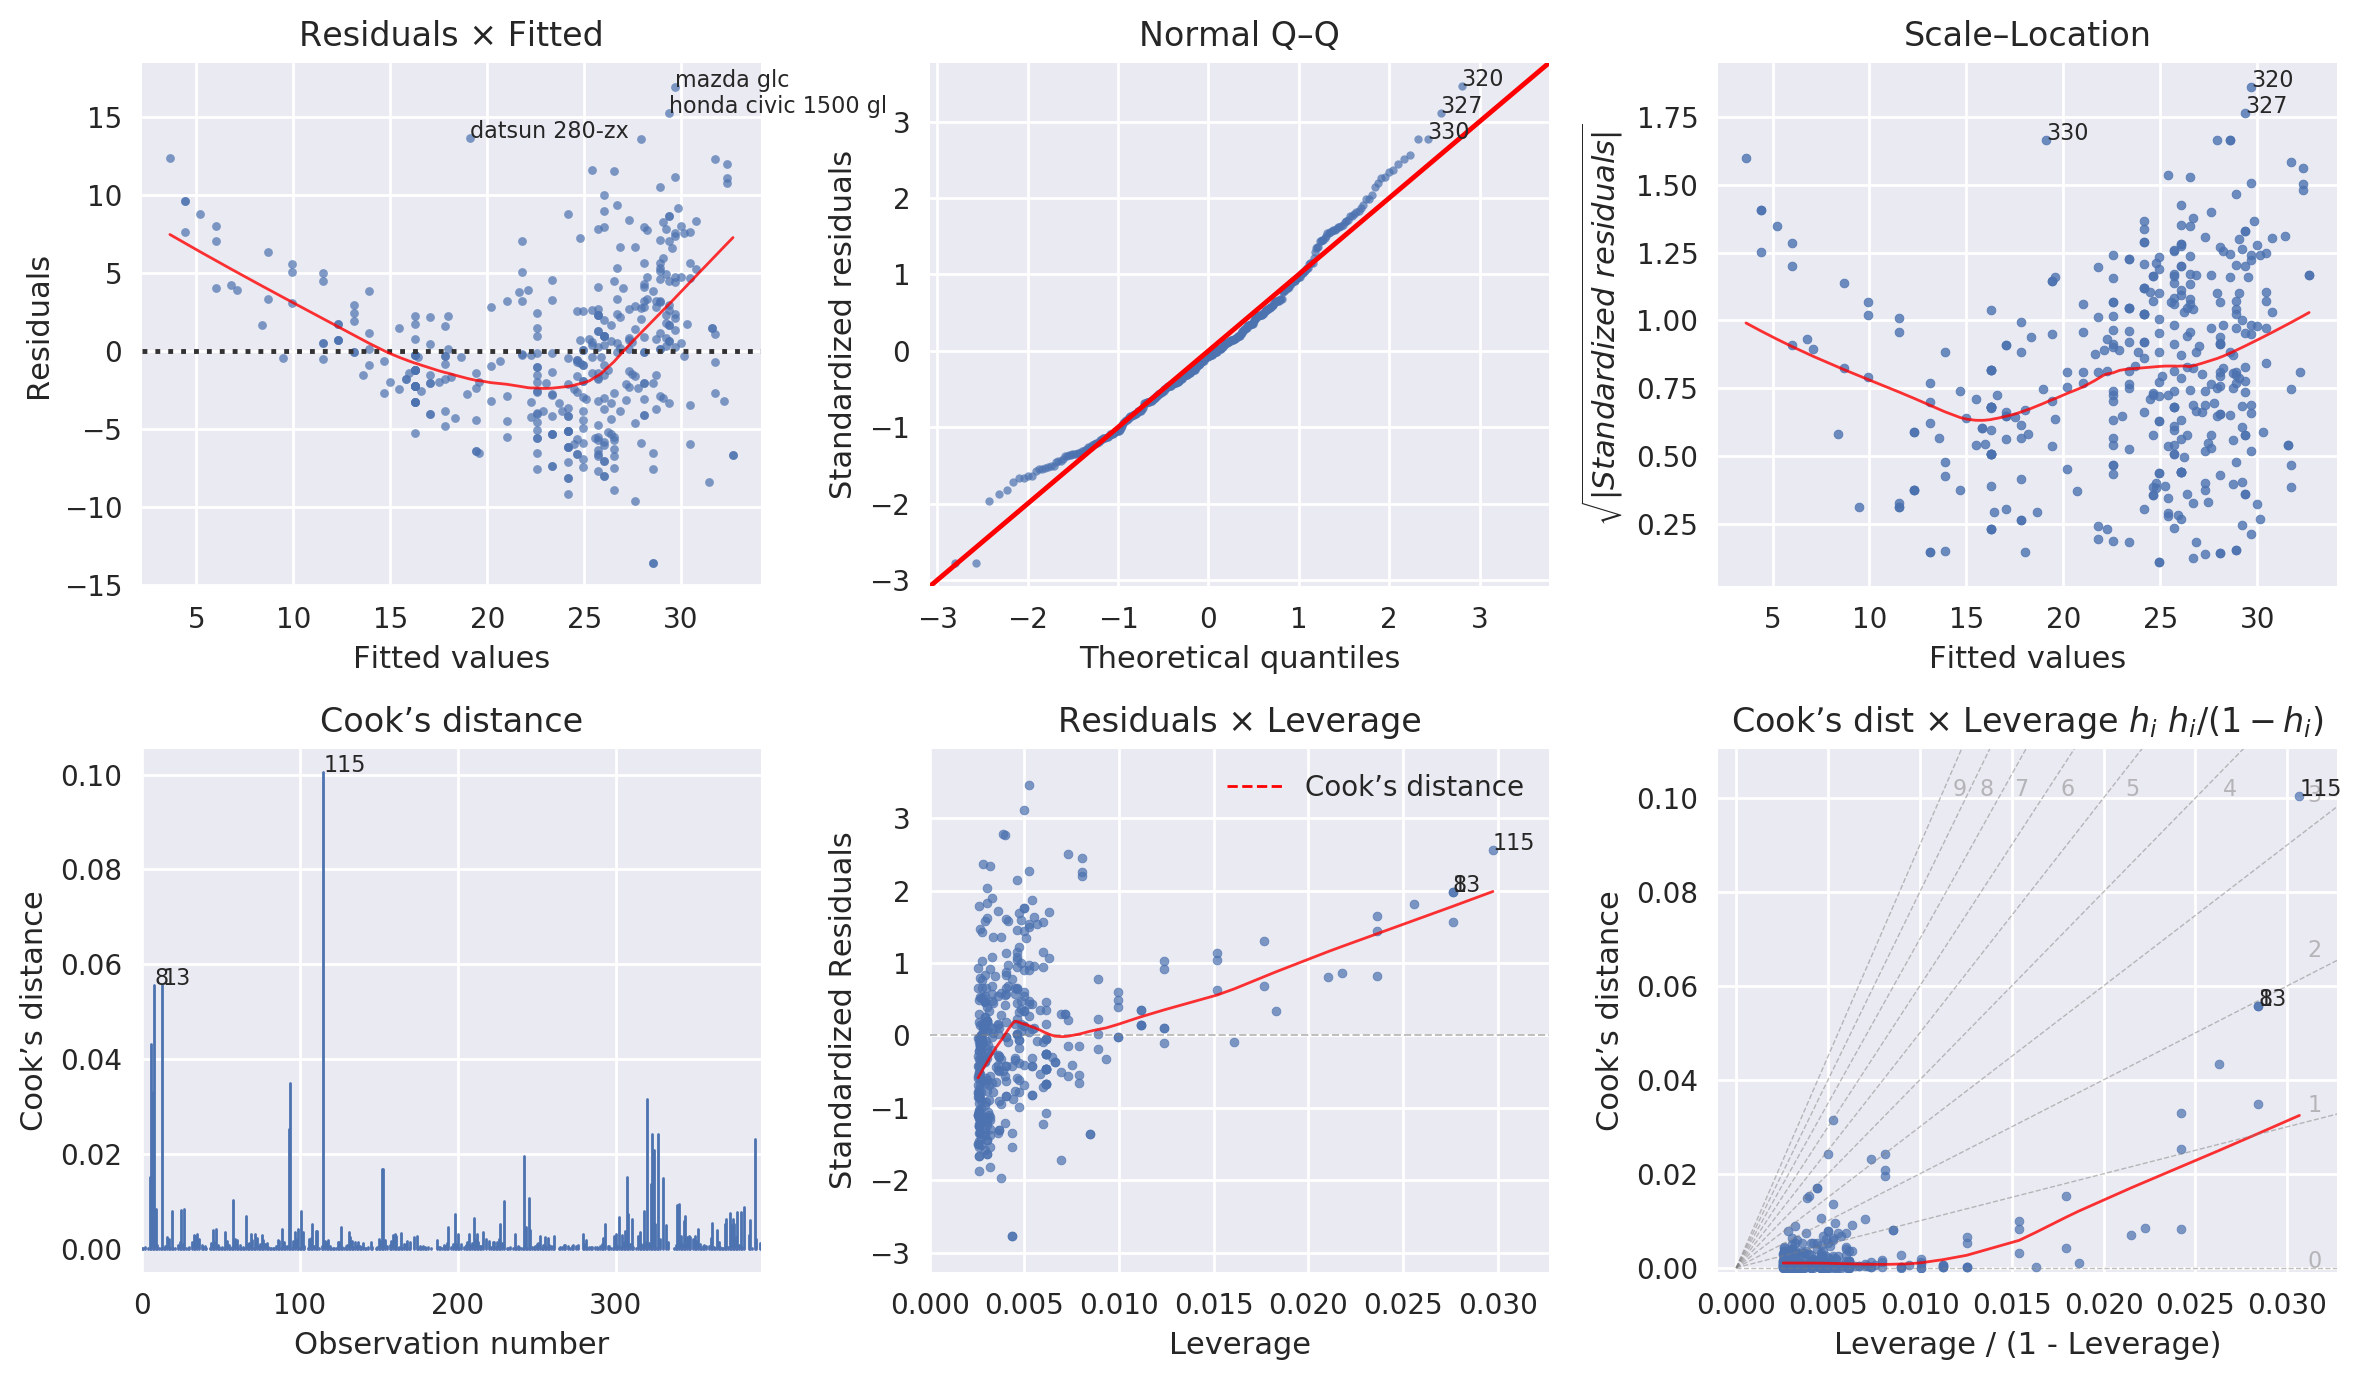

In [28]:
import diagnostics

model = smf.ols(formula=f'mpg ~ horsepower', data=Auto).fit()
model.summary()

diagnostics.lm_plot(model, Auto.dropna().mpg)

- **Residuals × Fitted**: Evidence of a non-linear relationship
- **Normal Q–Q**: The Q–Q plot of the residuals shows that they are not normally distributed, otherwise would follow a straight line.
- **Scale–Location**: This plot is useful to check for homoscedasticity. In this case, the residuals show a heterocedasticity spread, because the are concentrated in some values and more spread in others.
- **Residuals × Leverage**: This plot helps find influential observations, which can be outliers. We might have two outliers, 94 and 117 — both shown by the Cook’s distance.

### Exercise 9

This question involves the use of multiple linear regression on the **Auto MPG** data set.

#### Exercise 9a

Produce a scatter plot matrix which includes all of the variables in the data set.

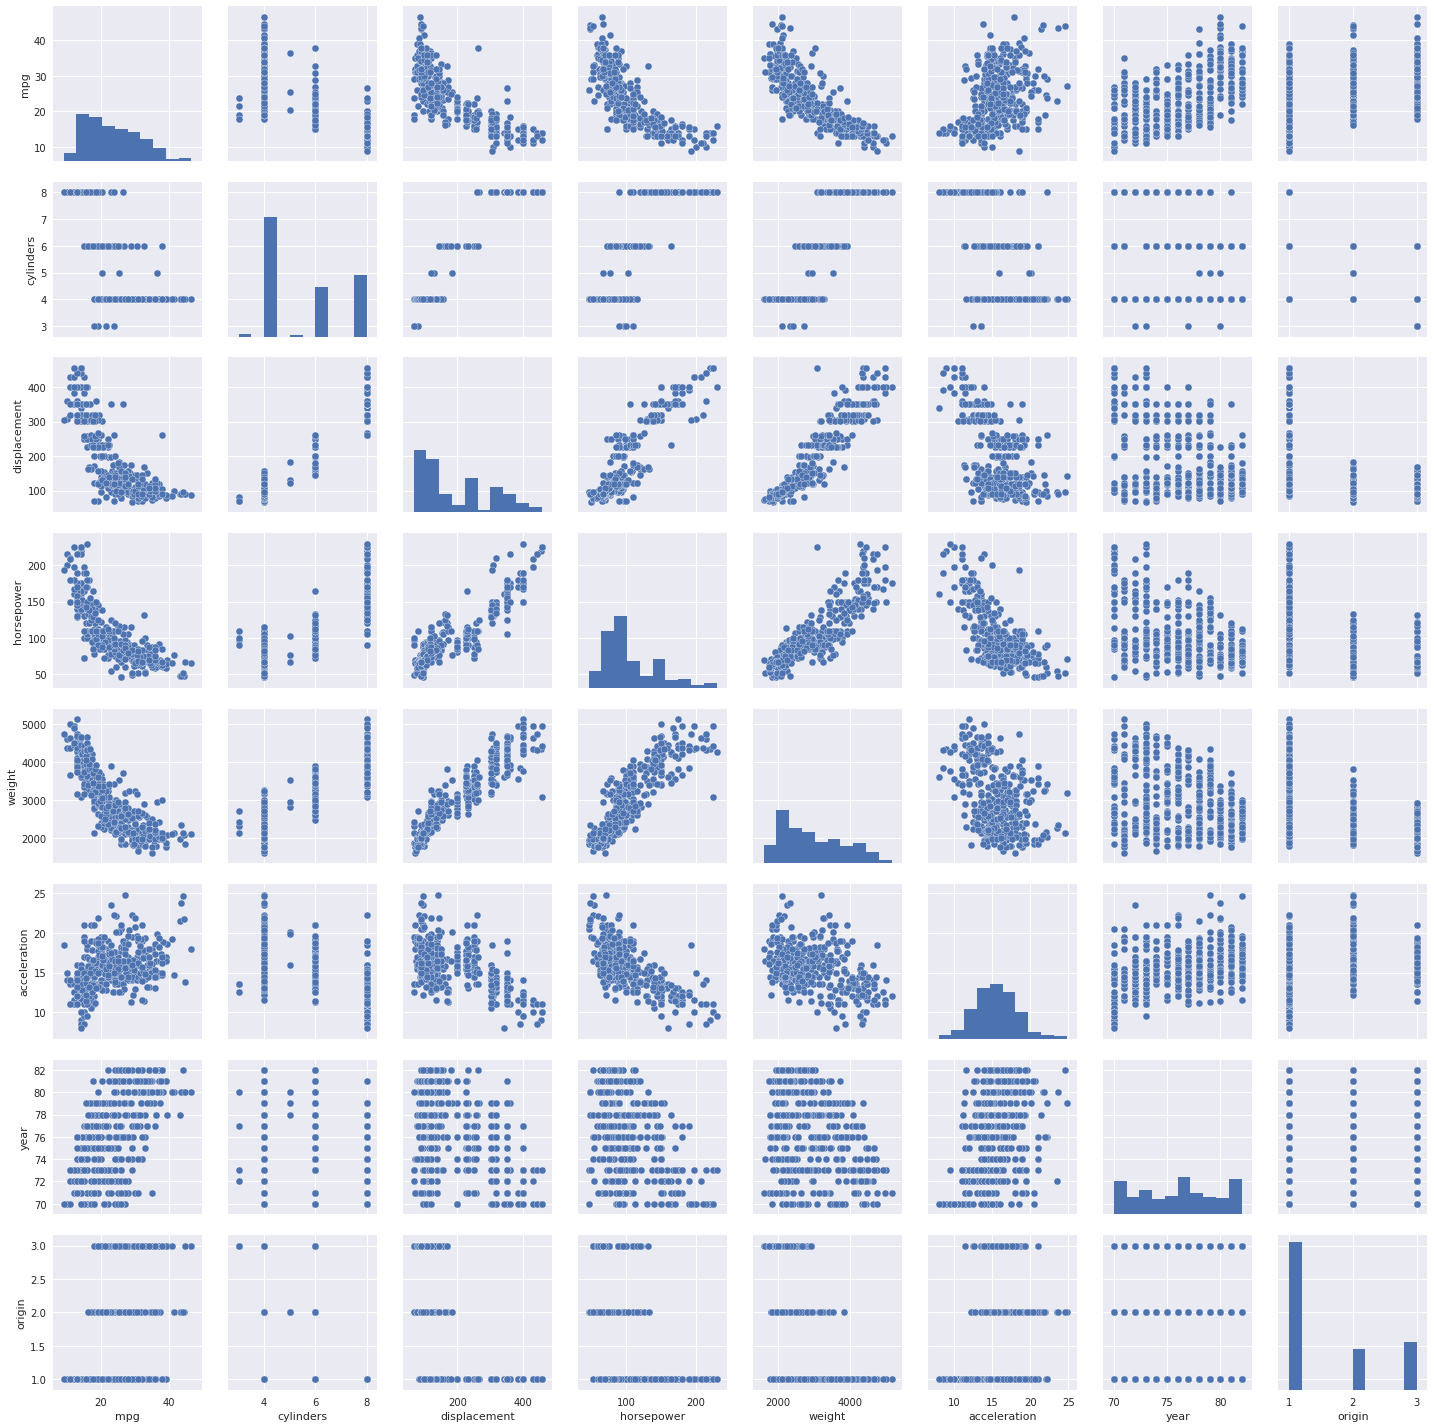

In [29]:
sns.pairplot(Auto.dropna())

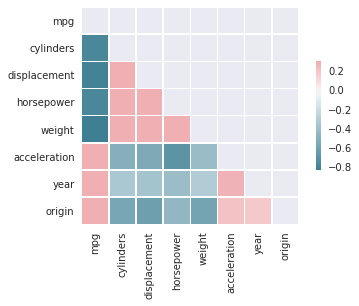

In [30]:
corr = Auto.dropna().corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(6, 4))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws=dict(shrink=.5));

#### Exercise 9c

Use the `lm()` function to perform a multiple linear regression with **mpg** as the response and all other variables except **name** as the predictors. Use the `summary()` function to print the results. Comment on the output.

In [31]:
features = '+'.join([col for col in Auto.columns if col not in ['mpg', 'name']])
model = smf.ols(formula=f'mpg ~ {features}', data=Auto).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     252.4
Date:                Sat, 28 Apr 2018   Prob (F-statistic):          2.04e-139
Time:                        12:50:31   Log-Likelihood:                -1023.5
No. Observations:                 392   AIC:                             2063.
Df Residuals:                     384   BIC:                             2095.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      -17.2184      4.644     -3.707      0.000     -26.350      -8.087
cylinders       -0.4934      0.323     -1.526      0.128      -1.129       0.142
displacement     0.0199      0.008      2.647      0.008       0.005       0.035
horsepower      -0.0170      0.014     -1.230      0.220      -0.044       0.010
weight          -0.0065      0.001     -9.929      0.000      -0.008      -0.005
acceleration     0.0806      0.099      0.815      0.415      -0.114       0.275
year             0.7508      0.051     14.729      0.000       0.651       0.851
origin           1.4261      0.278      5.127      0.000       0.879       1.973
==============================================================================
Omnibus:                       31.906   Durbin-Watson:                   1.309
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               53.100
Skew:                           0.529   Prob(JB):                     2.95e-12
Kurtosis:                       4.460   Cond. No.                     8.59e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.59e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

1. Is there a relationship between the predictors and the response?

The $F$ is the ratio of two variances ($SSR/SSE$), the variance explained by the parameters in the model (sum of squares of regression, SSR) and the residual or unexplained variance (sum of squares of error, SSE). 

The F-statistic, and its respective p-value, is the statistic for the following null hypothesis:

$H_0: \beta_i , \forall i$, that is, all non-constant coefficients are zero

against the alternative hypothesis

$H_a:$ at least one of the non-constant coefficients is non-zero.

Thus, we may conclude there is at least one predictor related with the **mpg** measure.

2. Which predictors appear to have a statistically signiﬁcant relationship to the response?

Looking at the p-values, we can say that **weight**, **year**, **origin**, and **displacement** are the predictors with relationship.

3. What does the coeﬃcient for the year variable suggest?

The **year** coefficient suggests that the cars fuel efficiency increased by 0.75 mile per gallon per year — 0.75 mpg/year.

#### Exercise 9d

Use the `plot()` function to produce diagnostic plots of the linear regression ﬁt. Comment on any problems you see with the ﬁt.

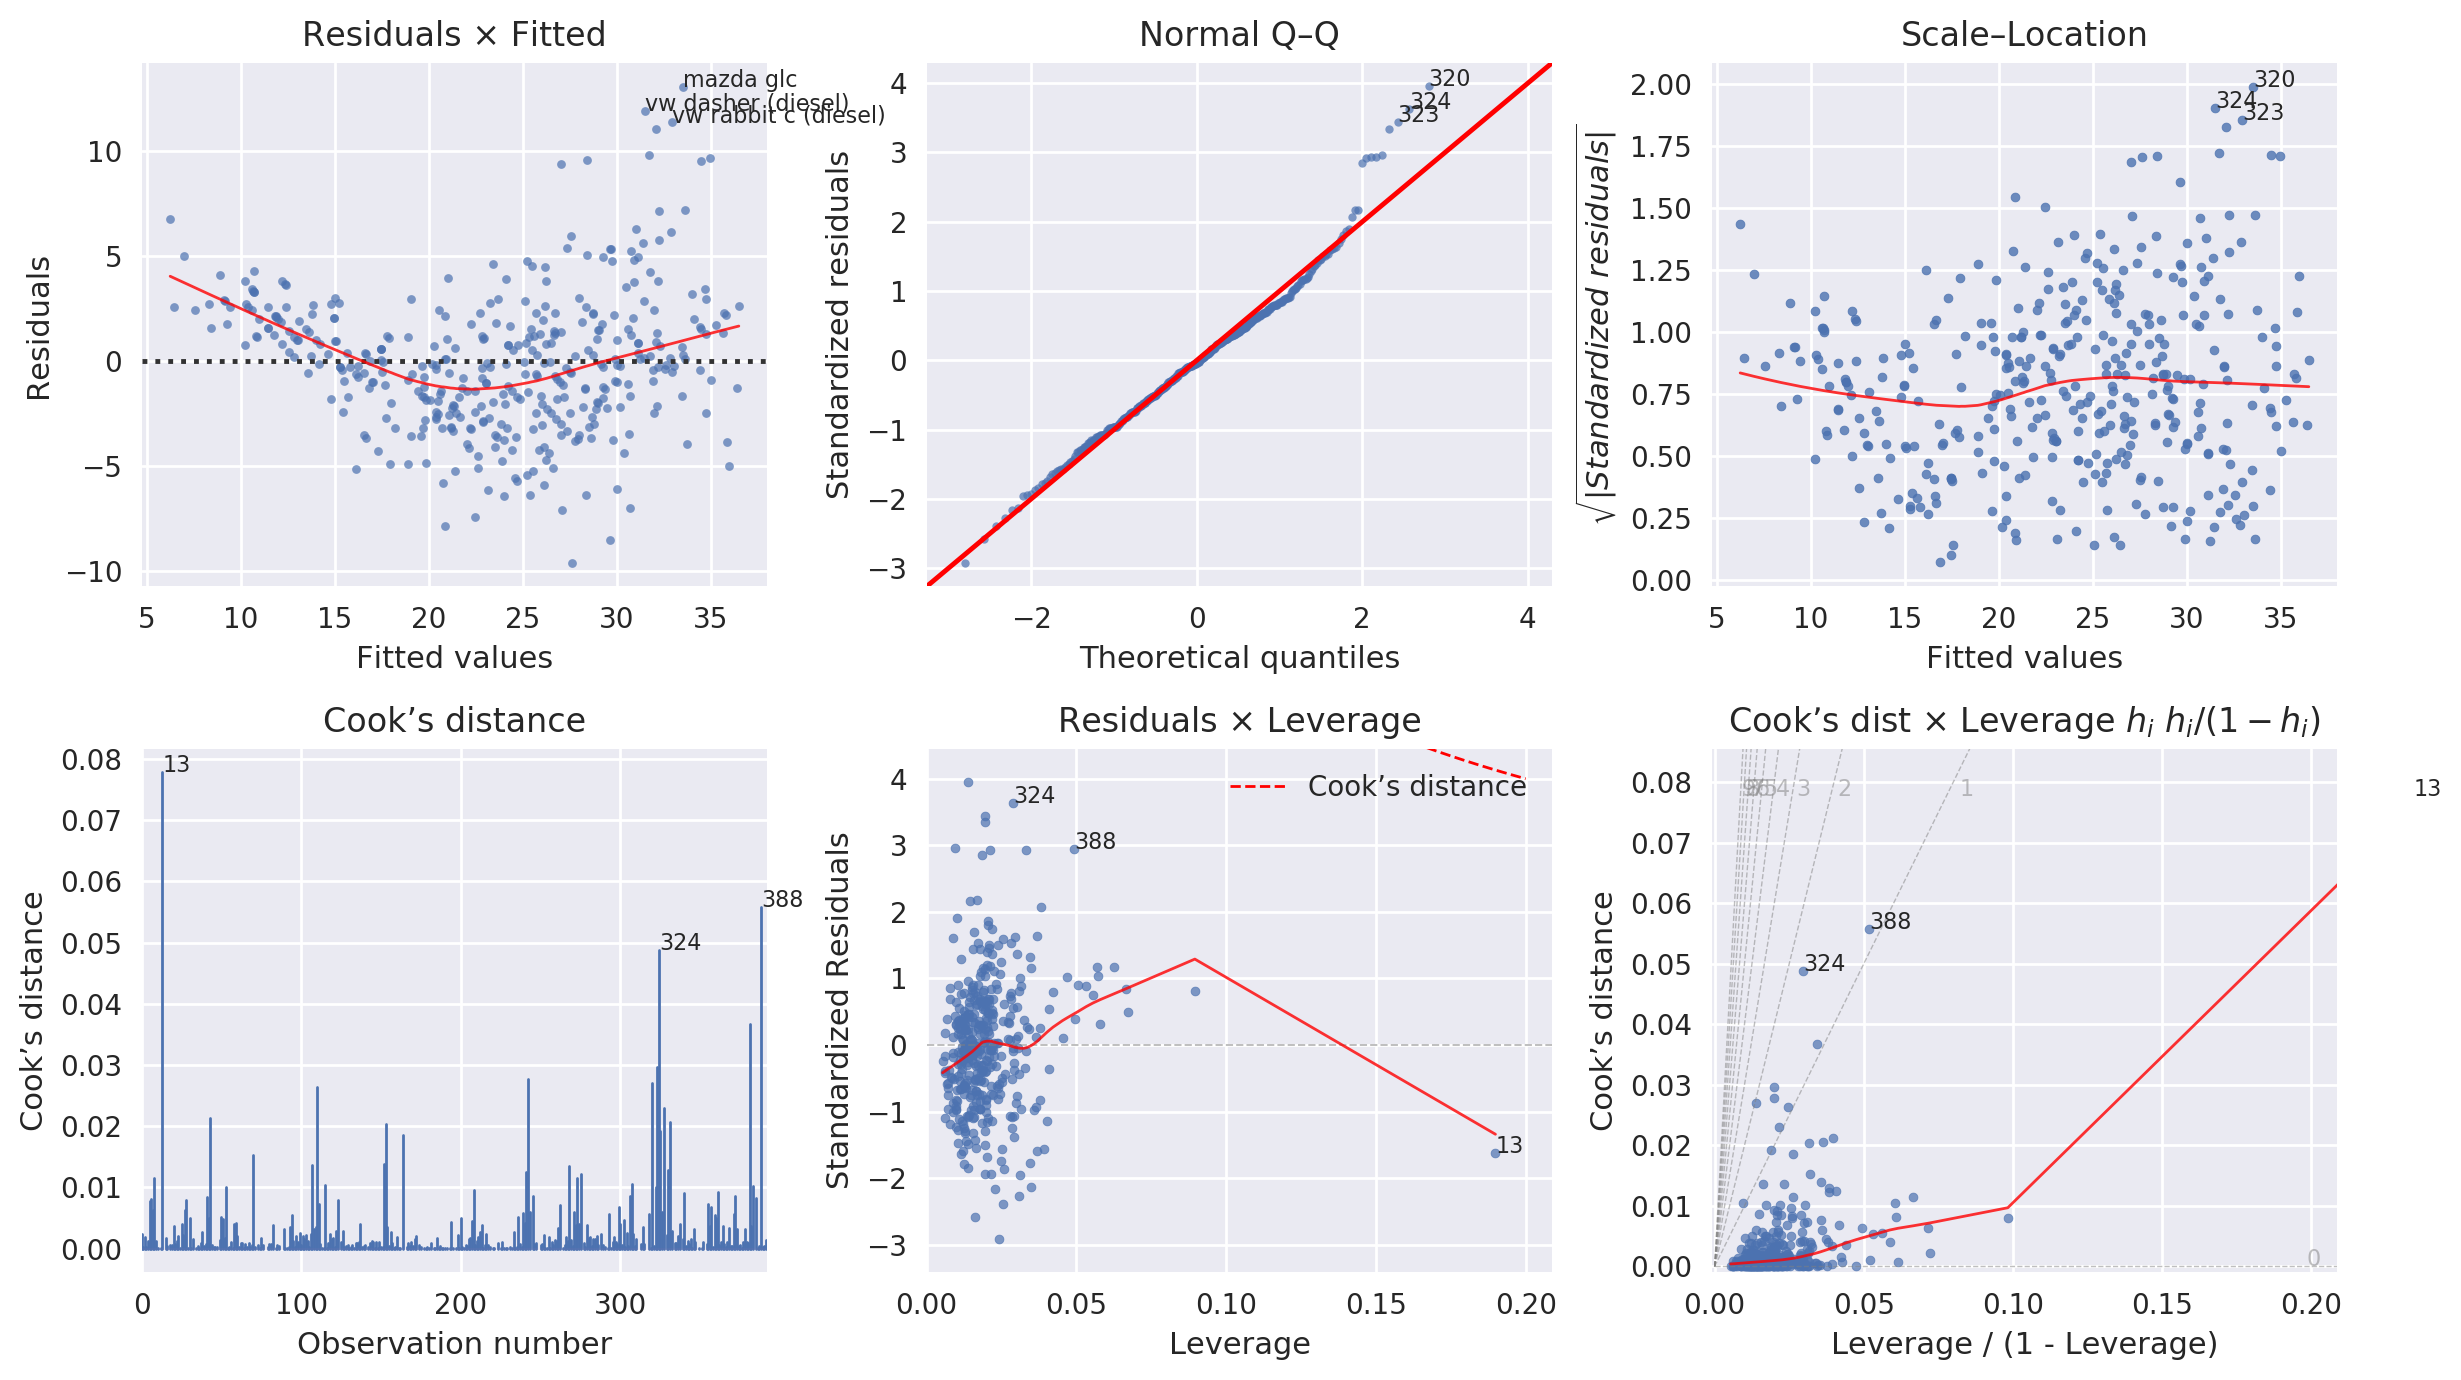

In [32]:
diagnostics.lm_plot(model, Auto.dropna().mpg)

- **Residuals × Fitted**: Evidence of a non-linear relationship
- **Normal Q–Q**: The Q–Q plot of the residuals shows that they are not normally distributed, otherwise would follow a straight line.
- **Scale–Location**: This plot is useful to check for homoscedasticity. In this case, the residuals show a heterocedasticity spread, because the are concentrated in some values and more spread in others.
- **Residuals × Leverage**: This plot helps find influential observations, which can be outliers. Particularly, the observation 14 seems to be an outlier.

Do the residual plots suggest any unusually large outliers? Does the leverage plot identify any observations with unusually high leverage?

There are three possible outliers — observations 14, 327, and 334:

In [33]:
Auto.iloc[[13, 324, 388]]

mpg  cylinders  displacement  horsepower  weight  \
name                                                                         
buick estate wagon (sw)  14.0          8         455.0       225.0    3086   
datsun 210               40.8          4          85.0        65.0    2110   
ford granada l           22.0          6         232.0       112.0    2835   

                         acceleration  year  origin  
name                                                 
buick estate wagon (sw)          10.0    70       1  
datsun 210                       19.2    80       3  
ford granada l                   14.7    82       1

I will remove the observation 14 for the rest of this exercise:

In [34]:
AutoClean = Auto.drop(Auto.index[[13, 324, 388]])

#### Exercise 9e

Use the `*` and `:` symbols to ﬁt linear regression models with interaction eﬀects. Do any interactions appear to be statistically signiﬁcant?

In [35]:
from itertools import product

feat_list = [col for col in Auto.columns if col not in ['mpg', 'name']]
interactions = [f'{a}*{b}' for a, b in product(feat_list, feat_list)]
features = ' + '.join(interactions)
model = smf.ols(formula=f'mpg ~ {features}', data=Auto).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.889
Model:                            OLS   Adj. R-squared:                  0.881
Method:                 Least Squares   F-statistic:                     104.2
Date:                Sat, 28 Apr 2018   Prob (F-statistic):          4.01e-155
Time:                        12:50:35   Log-Likelihood:                -929.72
No. Observations:                 392   AIC:                             1917.
Df Residuals:                     363   BIC:                             2033.
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                    35.4789     53.136      0.668      0.505     -69.014     139.972
cylinders                     6.9886      8.248      0.847      0.397      -9.231      23.208
displacement                 -0.4785      0.189     -2.527      0.012      -0.851      -0.106
cylinders:displacement       -0.0034      0.006     -0.524      0.601      -0.016       0.009
horsepower                    0.5034      0.347      1.451      0.148      -0.179       1.186
cylinders:horsepower          0.0116      0.024      0.480      0.632      -0.036       0.059
weight                        0.0041      0.018      0.235      0.814      -0.030       0.039
cylinders:weight              0.0004      0.001      0.399      0.690      -0.001       0.002
acceleration                 -5.8592      2.174     -2.696      0.007     -10.134      -1.585
cylinders:acceleration        0.2779      0.166      1.670      0.096      -0.049       0.605
year                          0.6974      0.610      1.144      0.253      -0.501       1.896
cylinders:year               -0.1741      0.097     -1.793      0.074      -0.365       0.017
origin                      -20.8956      7.097     -2.944      0.003     -34.852      -6.939
cylinders:origin              0.4022      0.493      0.816      0.415      -0.567       1.371
displacement:horsepower   -8.491e-05      0.000     -0.294      0.769      -0.001       0.000
displacement:weight        2.472e-05   1.47e-05      1.682      0.093   -4.18e-06    5.36e-05
displacement:acceleration    -0.0035      0.003     -1.041      0.299      -0.010       0.003
displacement:year             0.0059      0.002      2.482      0.014       0.001       0.011
displacement:origin           0.0240      0.019      1.232      0.219      -0.014       0.062
horsepower:weight         -1.968e-05   2.92e-05     -0.673      0.501   -7.72e-05    3.78e-05
horsepower:acceleration      -0.0072      0.004     -1.939      0.053      -0.015       0.000
horsepower:year              -0.0058      0.004     -1.482      0.139      -0.014       0.002
horsepower:origin             0.0022      0.029      0.076      0.939      -0.055       0.060
weight:acceleration           0.0002      0.000      1.025      0.306      -0.000       0.001
weight:year                  -0.0002      0.000     -1.056      0.292      -0.001       0.000
weight:origin                -0.0006      0.002     -0.364      0.716      -0.004       0.003
acceleration:year             0.0556      0.026      2.174      0.030       0.005       0.106
acceleration:origin           0.4583      0.157      2.926      0.004       0.150       0.766
year:origin                   0.1393      0.074      1.882      0.061      -0.006       0.285
===========================================================================

In [36]:
from itertools import product

feat_list = [col for col in Auto.columns if col not in ['mpg', 'name']]
interactions = [f'{a}:{b}' for a, b in product(feat_list, feat_list)]
features = ' + '.join(interactions)
model = smf.ols(formula=f'mpg ~ {features}', data=Auto).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.889
Model:                            OLS   Adj. R-squared:                  0.881
Method:                 Least Squares   F-statistic:                     104.2
Date:                Sat, 28 Apr 2018   Prob (F-statistic):          4.01e-155
Time:                        12:50:35   Log-Likelihood:                -929.72
No. Observations:                 392   AIC:                             1917.
Df Residuals:                     363   BIC:                             2033.
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                    35.4789     53.136      0.668      0.505     -69.014     139.972
cylinders                     6.9886      8.248      0.847      0.397      -9.231      23.208
cylinders:displacement       -0.0034      0.006     -0.524      0.601      -0.016       0.009
cylinders:horsepower          0.0116      0.024      0.480      0.632      -0.036       0.059
cylinders:weight              0.0004      0.001      0.399      0.690      -0.001       0.002
cylinders:acceleration        0.2779      0.166      1.670      0.096      -0.049       0.605
cylinders:year               -0.1741      0.097     -1.793      0.074      -0.365       0.017
cylinders:origin              0.4022      0.493      0.816      0.415      -0.567       1.371
displacement                 -0.4785      0.189     -2.527      0.012      -0.851      -0.106
displacement:horsepower   -8.491e-05      0.000     -0.294      0.769      -0.001       0.000
displacement:weight        2.472e-05   1.47e-05      1.682      0.093   -4.18e-06    5.36e-05
displacement:acceleration    -0.0035      0.003     -1.041      0.299      -0.010       0.003
displacement:year             0.0059      0.002      2.482      0.014       0.001       0.011
displacement:origin           0.0240      0.019      1.232      0.219      -0.014       0.062
horsepower                    0.5034      0.347      1.451      0.148      -0.179       1.186
horsepower:weight         -1.968e-05   2.92e-05     -0.673      0.501   -7.72e-05    3.78e-05
horsepower:acceleration      -0.0072      0.004     -1.939      0.053      -0.015       0.000
horsepower:year              -0.0058      0.004     -1.482      0.139      -0.014       0.002
horsepower:origin             0.0022      0.029      0.076      0.939      -0.055       0.060
weight                        0.0041      0.018      0.235      0.814      -0.030       0.039
weight:acceleration           0.0002      0.000      1.025      0.306      -0.000       0.001
weight:year                  -0.0002      0.000     -1.056      0.292      -0.001       0.000
weight:origin                -0.0006      0.002     -0.364      0.716      -0.004       0.003
acceleration                 -5.8592      2.174     -2.696      0.007     -10.134      -1.585
acceleration:year             0.0556      0.026      2.174      0.030       0.005       0.106
acceleration:origin           0.4583      0.157      2.926      0.004       0.150       0.766
year                          0.6974      0.610      1.144      0.253      -0.501       1.896
year:origin                   0.1393      0.074      1.882      0.061      -0.006       0.285
origin                      -20.8956      7.097     -2.944      0.003     -34.852      -6.939
===========================================================================

The interactions **displacement:year**, **acceleration:year**, and **acceleration:origin** seem to be relevant.

In [37]:
from itertools import product

# All features
feat_list = [col for col in Auto.columns if col not in ['mpg', 'name']]
features = ' + '.join(feat_list)

# Interactions
interactions = 'displacement:year + acceleration:year + acceleration:origin'

model = smf.ols(formula=f'mpg ~ {features} + {interactions}', data=Auto).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.855
Model:                            OLS   Adj. R-squared:                  0.851
Method:                 Least Squares   F-statistic:                     224.4
Date:                Sat, 28 Apr 2018   Prob (F-statistic):          6.66e-153
Time:                        12:50:35   Log-Likelihood:                -982.93
No. Observations:                 392   AIC:                             1988.
Df Residuals:                     381   BIC:                             2032.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              11.8757     27.471      0.432      0.666     -42.139      65.890
cylinders              -0.1269      0.303     -0.419      0.675      -0.722       0.468
displacement            0.1708      0.043      3.969      0.000       0.086       0.255
horsepower             -0.0371      0.013     -2.921      0.004      -0.062      -0.012
weight                 -0.0049      0.001     -7.868      0.000      -0.006      -0.004
acceleration           -3.6460      1.430     -2.549      0.011      -6.458      -0.834
year                    0.5476      0.356      1.538      0.125      -0.153       1.248
origin                 -7.0940      1.583     -4.483      0.000     -10.206      -3.982
displacement:year      -0.0023      0.001     -3.994      0.000      -0.003      -0.001
acceleration:year       0.0375      0.019      2.010      0.045       0.001       0.074
acceleration:origin     0.5078      0.096      5.304      0.000       0.320       0.696
==============================================================================
Omnibus:                       40.249   Durbin-Watson:                   1.620
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               72.706
Skew:                           0.616   Prob(JB):                     1.63e-16
Kurtosis:                       4.712   Cond. No.                     3.03e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.03e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

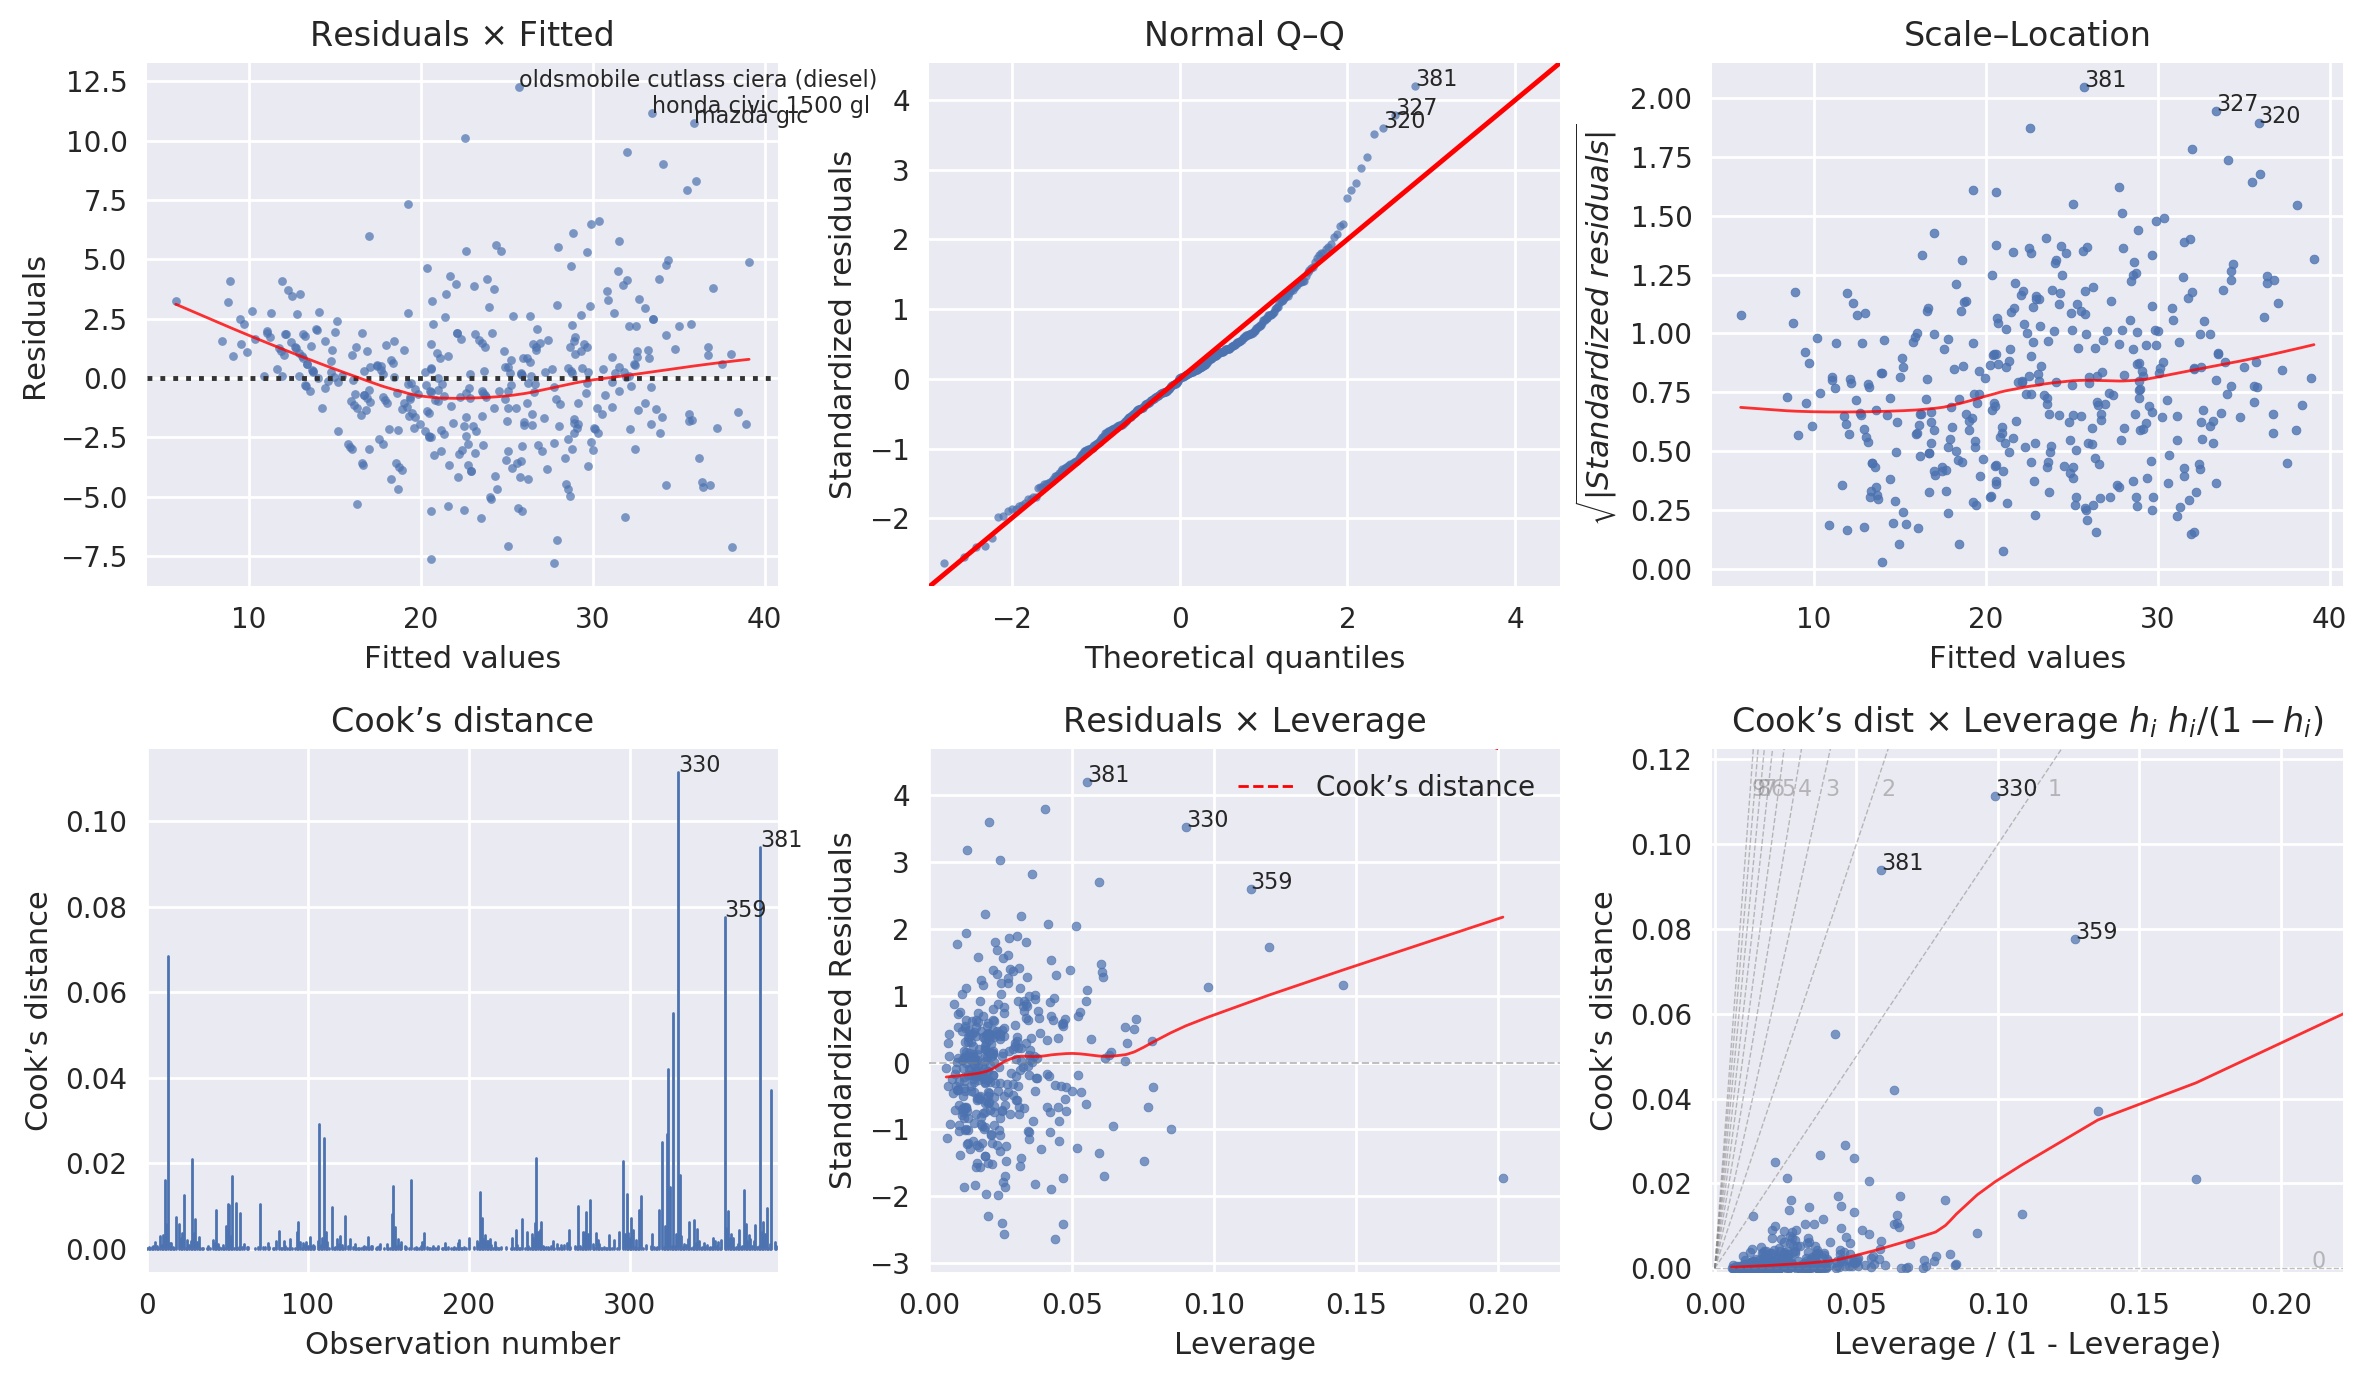

In [38]:
diagnostics.lm_plot(model, Auto.dropna().mpg)

#### Exercise 9f

Try a few diﬀerent transformations of the variables, such as $log(X)$, $\sqrt{X}$, $X^2$. Comment on your ﬁndings.

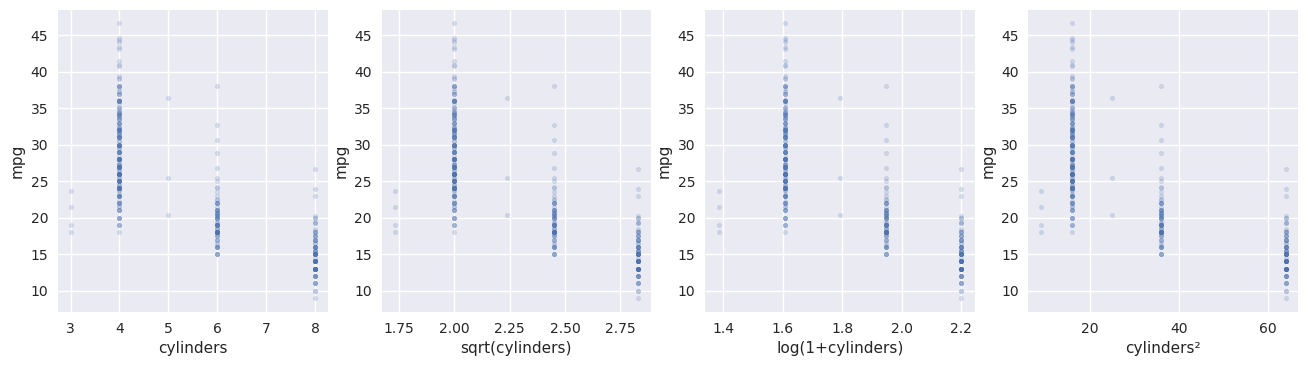

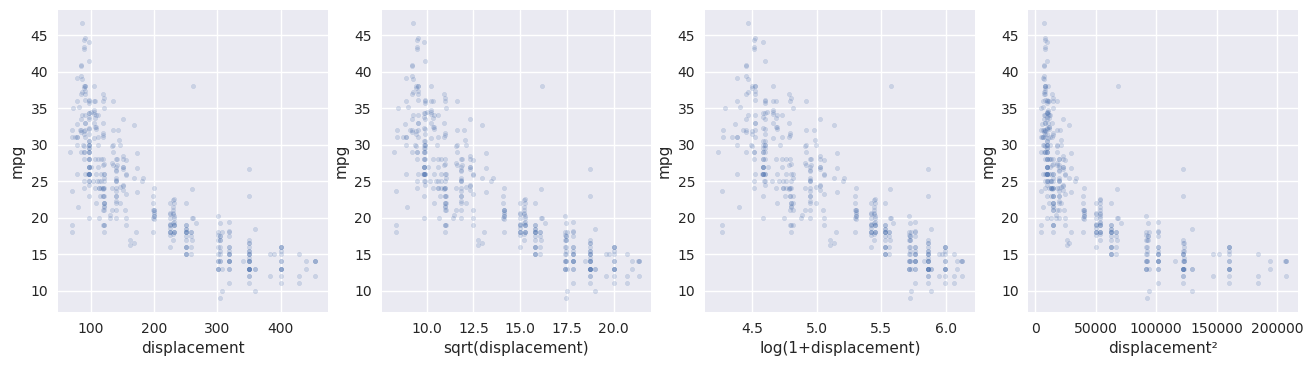

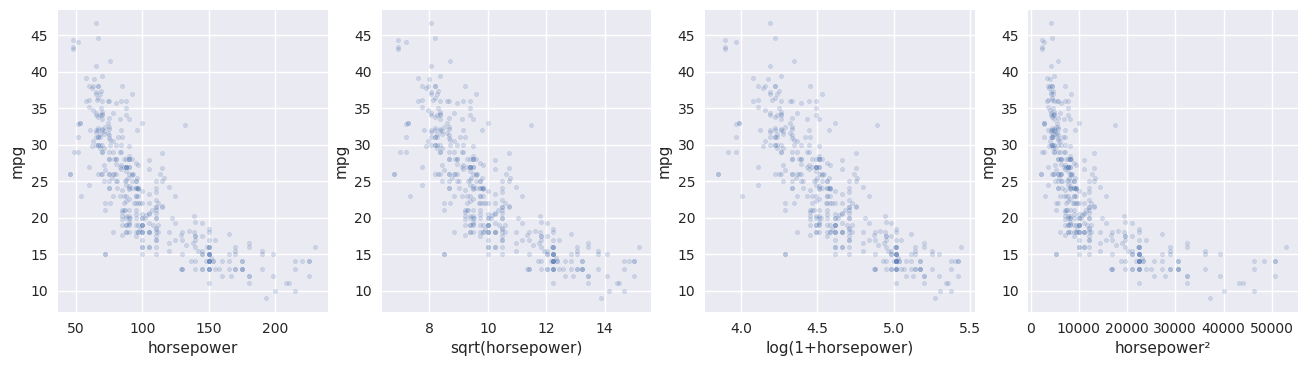

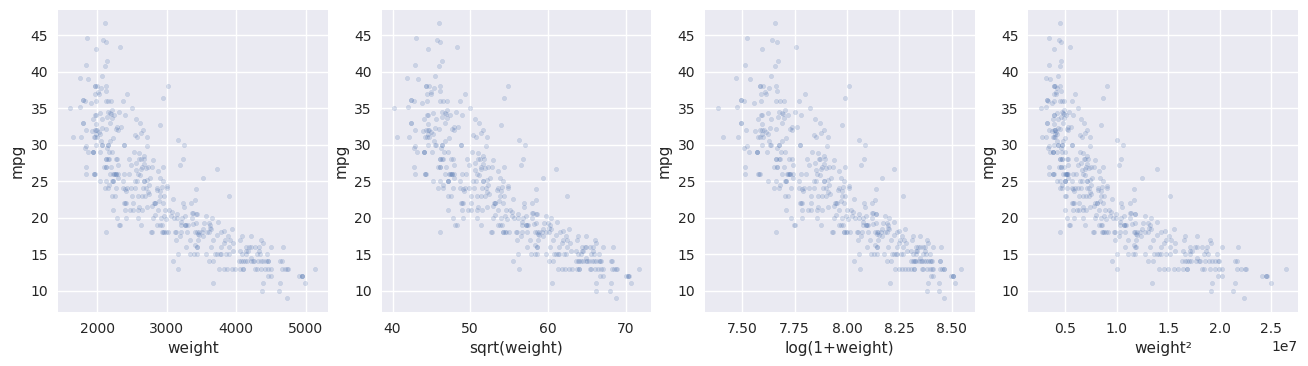

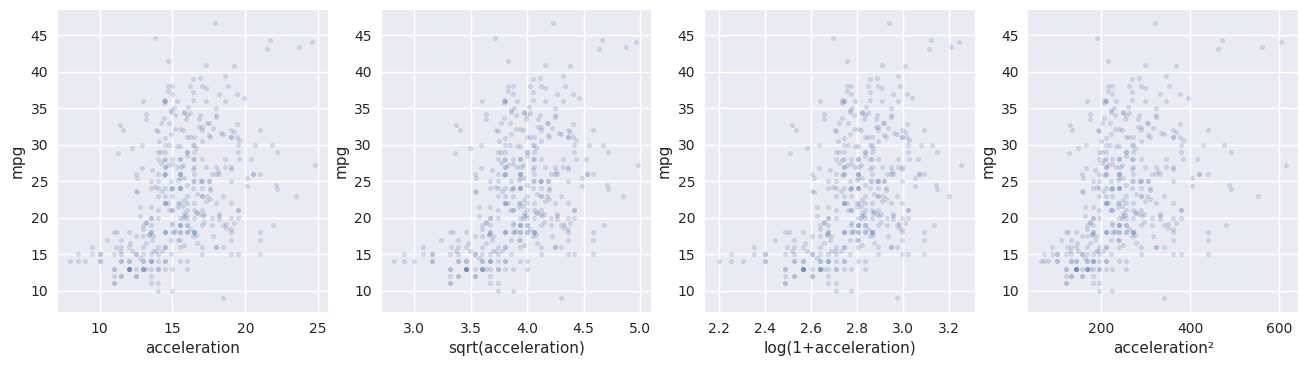

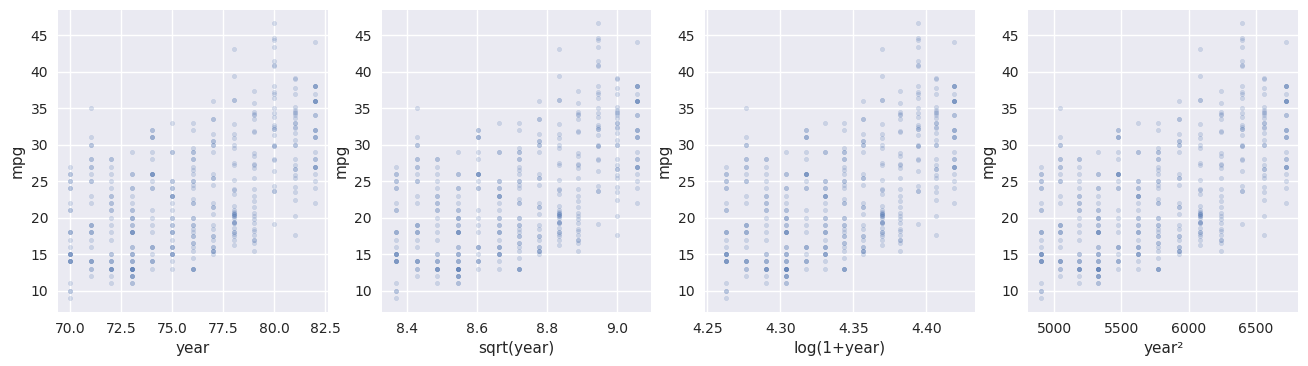

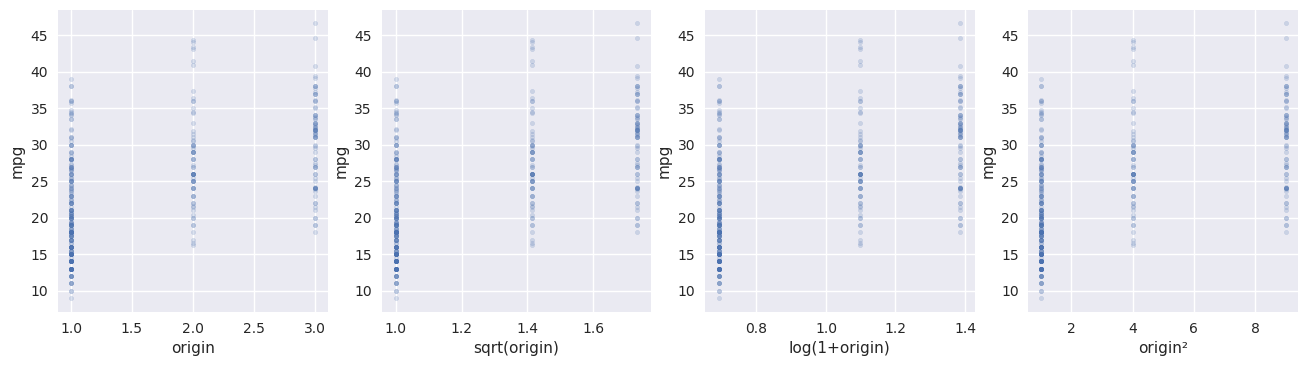

In [39]:
features = [col for col in Auto.columns if col not in ['mpg', 'name']]

for feature in features:
    fig, ax = plt.subplots(1, 4, figsize=(16, 4), dpi=100)
    ax[0].scatter(Auto[feature], Auto.mpg, s=10, alpha=0.2)
    ax[0].set_xlabel(f'{feature}')
    ax[0].set_ylabel('mpg')

    ax[1].scatter(np.sqrt(Auto[feature]), Auto.mpg, s=10, alpha=0.2)
    ax[1].set_xlabel(f'sqrt({feature})')
    ax[1].set_ylabel('mpg')

    ax[2].scatter(np.log1p(Auto[feature]), Auto.mpg, s=10, alpha=0.2)
    ax[2].set_xlabel(f'log(1+{feature})')
    ax[2].set_ylabel('mpg')

    ax[3].scatter(np.power(Auto[feature], 2), Auto.mpg, s=10, alpha=0.2)
    ax[3].set_xlabel(f'{feature}²')
    ax[3].set_ylabel('mpg')

    plt.show()

**log(horsepower)** and **log(weight)** are good transformations.
Let’s remove **cylinders** from our model — we’ve seen it had not
statistical siginificante — and we will add these two new transformations.

In [40]:
from itertools import product

# All features
feat_list = [col for col in Auto.columns if col not in ['mpg', 'name', 'cylinders']]
features = ' + '.join(feat_list)

# Interactions
interactions = 'displacement:year + acceleration:year + acceleration:origin'

# Transformations
transf = 'np.log(horsepower) + np.log(weight)'

model = smf.ols(formula=f'mpg ~ {features} + {transf} + {interactions}', data=Auto).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.879
Model:                            OLS   Adj. R-squared:                  0.875
Method:                 Least Squares   F-statistic:                     250.1
Date:                Sat, 28 Apr 2018   Prob (F-statistic):          1.95e-166
Time:                        12:50:41   Log-Likelihood:                -947.84
No. Observations:                 392   AIC:                             1920.
Df Residuals:                     380   BIC:                             1967.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept             296.4434     45.521      6.512      0.000     206.939     385.948
displacement            0.0467      0.043      1.077      0.282      -0.039       0.132
horsepower              0.0298      0.030      0.987      0.324      -0.030       0.089
weight                  0.0053      0.002      2.969      0.003       0.002       0.009
acceleration           -6.0155      1.342     -4.482      0.000      -8.655      -3.377
year                   -0.2217      0.338     -0.656      0.512      -0.886       0.443
origin                 -3.8175      1.509     -2.530      0.012      -6.784      -0.851
np.log(horsepower)     -8.8796      3.679     -2.414      0.016     -16.113      -1.646
np.log(weight)        -28.1631      5.600     -5.029      0.000     -39.174     -17.153
displacement:year      -0.0007      0.001     -1.323      0.187      -0.002       0.000
acceleration:year       0.0714      0.018      4.059      0.000       0.037       0.106
acceleration:origin     0.2693      0.092      2.922      0.004       0.088       0.451
==============================================================================
Omnibus:                       55.386   Durbin-Watson:                   1.702
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              135.054
Skew:                           0.707   Prob(JB):                     4.71e-30
Kurtosis:                       5.504   Cond. No.                     5.51e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.51e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Both transformations were good!

### Exercise 10

This question should be answered using the **Carseats** data set.

So this is a simulated data set containing sales of child car seats at 400 different stores, with 11 variables for each store.

**Variable** | **Description**
:- | :-
**Sales** | Unit sales (in thousands) at each location
**CompPrice** | Price charged by competitor at each location
**Income** | Community income level (in thousands of dollars)
**Advertising** | Local advertising budget for company at each location (in thousands of dollars)
**Population** | Population size in region (in thousands)
**Price** | Price company charges for car seats at each site
**ShelveLoc** | A factor with levels Bad, Good and Medium indicating the quality of the shelving location for the car seats at each site
**Age** | Average age of the local population
**Education** | Education level at each location
**Urban** | A factor with levels No and Yes to indicate whether the store is in an urban or rural location
**US** | A factor with levels No and Yes to indicate whether the store is in the US or not


In [41]:
Carseats = pd.read_csv('data/Carseats.csv')
Carseats.head()

Sales  CompPrice  Income  Advertising  Population  Price ShelveLoc  Age  \
0   9.50        138      73           11         276    120       Bad   42   
1  11.22        111      48           16         260     83      Good   65   
2  10.06        113      35           10         269     80    Medium   59   
3   7.40        117     100            4         466     97    Medium   55   
4   4.15        141      64            3         340    128       Bad   38   

   Education Urban   US  
0         17   Yes  Yes  
1         10   Yes  Yes  
2         12   Yes  Yes  
3         14   Yes  Yes  
4         13   Yes   No

In [42]:
Carseats.Price.describe()

count    400.000000
mean     115.795000
std       23.676664
min       24.000000
25%      100.000000
50%      117.000000
75%      131.000000
max      191.000000
Name: Price, dtype: float64

#### Exercise 10a

Fit a multiple regression model to predict **Sales** using **Price**, **Urban**, and **US**.

In [43]:
model = smf.ols(formula='Sales ~ Price + Urban + US', data=Carseats).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.234
Method:                 Least Squares   F-statistic:                     41.52
Date:                Sat, 28 Apr 2018   Prob (F-statistic):           2.39e-23
Time:                        12:50:42   Log-Likelihood:                -927.66
No. Observations:                 400   AIC:                             1863.
Df Residuals:                     396   BIC:                             1879.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       13.0435      0.651     20.036      0.000      11.764      14.323
Urban[T.Yes]    -0.0219      0.272     -0.081      0.936      -0.556       0.512
US[T.Yes]        1.2006      0.259      4.635      0.000       0.691       1.710
Price           -0.0545      0.005    -10.389      0.000      -0.065      -0.044
==============================================================================
Omnibus:                        0.676   Durbin-Watson:                   1.912
Prob(Omnibus):                  0.713   Jarque-Bera (JB):                0.758
Skew:                           0.093   Prob(JB):                        0.684
Kurtosis:                       2.897   Cond. No.                         628.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Exercise 10b

Provide an interpretation of each coeﬃcient in the model. Be careful—some of the variables in the model are qualitative!

First of all, we see that the F-statistic is high and the p-value (last row)
is very low, giving us strong evidence to reject the null hypothesis that all
coefficients are zero. Thus, at least one of the non-constant coefficients 
are non-zero.

Note also that **UrbanYes** has a high p-value; we analyze it regardless this.

- We can say that outside the US, 13 thousand child car seats were sold, whereas in US about more 1200 units are sold.
- For **UrbanYes**, we could say in urban areas fewer units are sold than rural areas,by an average of 21 units.
- As for the price change, an increase of 1 unit of **Price** leads to a decrease of the sales by 54 units.

#### Exercise 10c

Write out the model in equation form, being careful to handle the qualitative variables properly.

$$ Sales = 13.0435 - 0.0545 \times Price - 0.0219 \times UrbanYes + 1.2006 \times USYes + \epsilon$$

#### Exercise 10d

For which of the predictors can you reject the null hypothesis 
$H_0 : \beta_j = 0$?

**Price** and **USYes**, which have p-values lower than 5%.

#### Exercise 10e

On the basis of your response to the previous question, ﬁt a smaller model that only uses the predictors for which there is evidence of association with the outcome.

In [44]:
model = smf.ols(formula='Sales ~ Price + US', data=Carseats).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.235
Method:                 Least Squares   F-statistic:                     62.43
Date:                Sat, 28 Apr 2018   Prob (F-statistic):           2.66e-24
Time:                        12:50:42   Log-Likelihood:                -927.66
No. Observations:                 400   AIC:                             1861.
Df Residuals:                     397   BIC:                             1873.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     13.0308      0.631     20.652      0.000      11.790      14.271
US[T.Yes]      1.1996      0.258      4.641      0.000       0.692       1.708
Price         -0.0545      0.005    -10.416      0.000      -0.065      -0.044
==============================================================================
Omnibus:                        0.666   Durbin-Watson:                   1.912
Prob(Omnibus):                  0.717   Jarque-Bera (JB):                0.749
Skew:                           0.092   Prob(JB):                        0.688
Kurtosis:                       2.895   Cond. No.                         607.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Exercise 10f

How well do the models in (10a) and (10e) ﬁt the data?

Concerning the last model
- Adjusted R-squared has increased slightly (23.4% ⇒ 23.5%)
- F-statistic has increased (41.52 ⇒ 62.43)
- All predictors are relevant now

#### Exercise 10g

Using the model from (10e), obtain 95% conﬁdence intervals for the coeﬃcients.

In [45]:
model.conf_int()

0          1
Intercept  11.79032  14.271265
US[T.Yes]   0.69152   1.707766
Price      -0.06476  -0.044195

#### Exercise 10h

Is there evidence of outliers or high leverage observations in the model from (10e)?

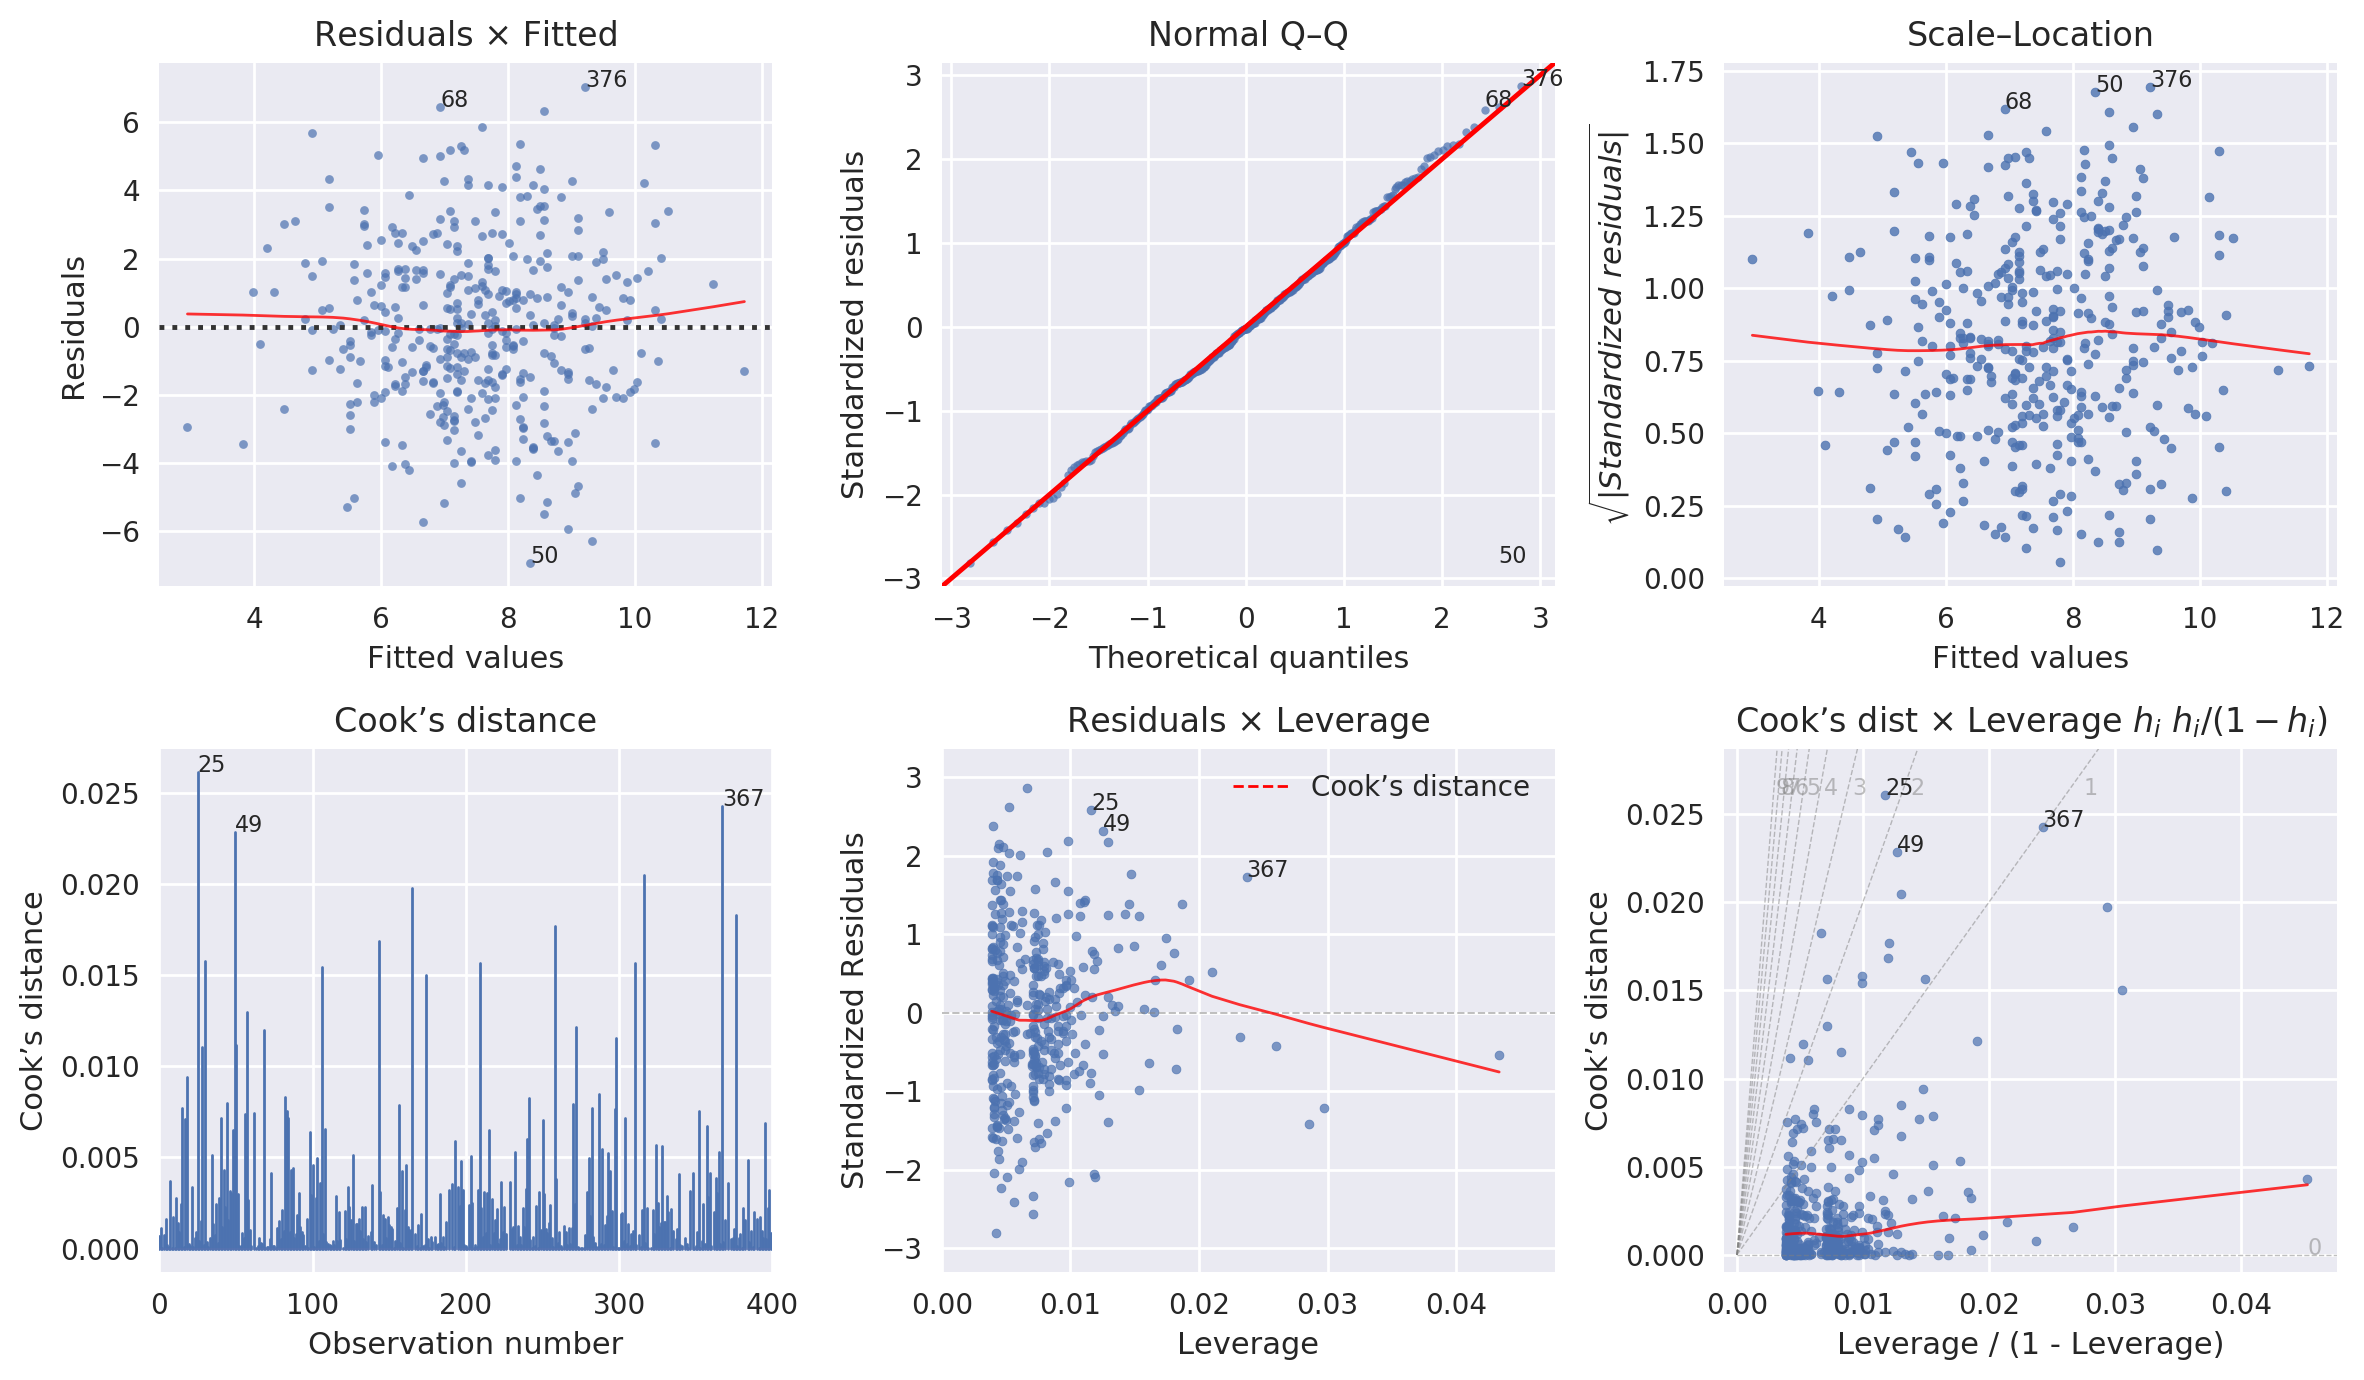

In [46]:
diagnostics.lm_plot(model, Carseats.Sales)

All values appear to be bounded in the range (-3, +3), which seem to indicate
no presence of outliers.

### Exercise 11

In this problem we will investigate the t-statistic for the null hypothesis $H_0 : \beta = 0$ in simple linear regression without an intercept. To begin, we generate a predictor **x** and a response **y** as follows.

In [47]:
np.random.seed(1)
x = np.random.normal(size=100)
y = 2*x + np.random.normal(size=100)

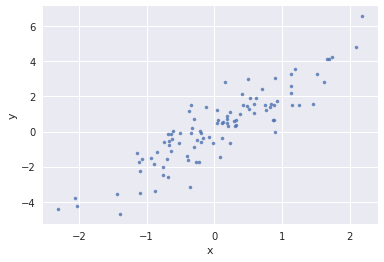

In [48]:
plt.scatter(x, y, s=10, alpha=0.8)
plt.xlabel('x')
plt.ylabel('y');

#### Exercise 11a

Perform a simple linear regression of **y** onto **x**, without an intercept. Report the coeﬃcient estimate $\beta$, the standard error of this coeﬃcient estimate, and the t-statistic and p-value associated with the null hypothesis $H_0 : \beta = 0$. Comment on these results. (You can perform regression without an intercept using the command `lm(y ∼ x + 0)`.)

In [49]:
X = pd.DataFrame(dict(x=x, y=y))

model = smf.ols(formula='y ~ x - 1', data=X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.798
Model:                            OLS   Adj. R-squared:                  0.796
Method:                 Least Squares   F-statistic:                     391.7
Date:                Sat, 28 Apr 2018   Prob (F-statistic):           3.46e-36
Time:                        12:50:45   Log-Likelihood:                -135.67
No. Observations:                 100   AIC:                             273.3
Df Residuals:                      99   BIC:                             275.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x              2.1067      0.106     19.792      0.000       1.896       2.318
==============================================================================
Omnibus:                        0.880   Durbin-Watson:                   2.106
Prob(Omnibus):                  0.644   Jarque-Bera (JB):                0.554
Skew:                          -0.172   Prob(JB):                        0.758
Kurtosis:                       3.119   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Since we know the actual function $f(x)$, we can see that the $\beta$ coefficient 1.9939
got close of the real coefficient 2.  By looking at the coefficient interval:

In [50]:
model.conf_int()

0         1
x  1.895531  2.317952

We can note that the interval is very large even though the coefficient estimate
is very close to the actual.

Finally, we can see the p-value associated with the null hypothesis $H_0 : \beta$ 
is sufficiently low so we can reject the null hypothesis.

#### Exercise 11b

Now perform a simple linear regression of **x** onto **y** without an intercept, and report the coeﬃcient estimate, its standard error, and the corresponding t-statistic and p-values associated with the null hypothesis $H_0 : \beta = 0$. Comment on these results.

In [51]:
model = smf.ols(formula='x ~ y - 1', data=X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      x   R-squared:                       0.798
Model:                            OLS   Adj. R-squared:                  0.796
Method:                 Least Squares   F-statistic:                     391.7
Date:                Sat, 28 Apr 2018   Prob (F-statistic):           3.46e-36
Time:                        12:50:45   Log-Likelihood:                -49.891
No. Observations:                 100   AIC:                             101.8
Df Residuals:                      99   BIC:                             104.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
y              0.3789      0.019     19.792      0.000       0.341       0.417
==============================================================================
Omnibus:                        0.476   Durbin-Watson:                   2.166
Prob(Omnibus):                  0.788   Jarque-Bera (JB):                0.631
Skew:                           0.115   Prob(JB):                        0.729
Kurtosis:                       2.685   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

We also know the actual function here, $x = \frac{1}{2} (y - \epsilon)$.  Our coefficient estimate is
0.39. Let’s check the coefficient interval:

In [52]:
model.conf_int()

0         1
y  0.340918  0.416891

I expected that the coefficient interval would include the actual $\beta = 0.5$. 
However, this coefficient interval does not.

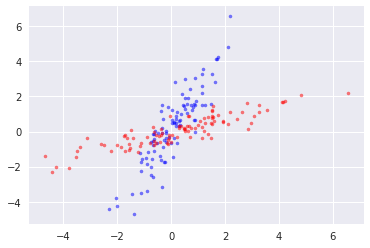

In [53]:
plt.scatter(x, y, s=10, c='blue', alpha=0.5)
plt.scatter(y, x, s=10, c='red', alpha=0.5);

#### Exercise 11c

What is the relationship between the results obtained in (11a) and (11b)?

In (11a) we approximated $y = 2x + \epsilon$, whereas in (11b) we approximated
the inverse function, $x = \frac{1}{2} (y - \epsilon)$.

Both (11a) and (11b) have the same $R^2$, F-statistic and its p-value.

#### Exercise 11d

For the regression of **y** onto **x** without an intercept, the t-statistic for 
$H_0 : \beta = 0$ takes the form $\frac{\hat\beta}{SE(\hat\beta)}$, where
$$
\hat\beta = 
    \frac{
        \sum_{i = 1}^{n} x_i y_i
    }{
        \sum_{i' = 1}^{n} x_{i'}^{2}
    },
$$
and
$$ 
SE(\hat\beta) = \sqrt{ 
    \frac{
        \sum_{i = 1}^{n} \left( y_i - x_i \hat\beta \right)^2
    }{
        \left( n - 1 \right) \sum_{i' = 1}^{n} x_{i'}^{2}
    }
}.
$$
(These formulas are slightly diﬀerent from those given in Sections 3.1.1 and 3.1.2, since here we are performing regression without an intercept.) Show algebraically, and conﬁrm numerically in R, that the t-statistic can be written as
$$
\frac{
    \left( \sqrt{n - 1} \right) \sum_{i = 1}^{n} x_i y_i
}{
    \sqrt{
        \left( \sum_{i = 1}^{n} x_i^2 \right)
        \left( \sum_{i' = 1}^{n} y_{i'}^{2} \right)
        \left( \sum_{i' = 1}^{n} x_{i'} y_{i'} \right)^2
    }
}.
$$

$$
t = 
\frac{
    % beta estimate
    \frac{
        \sum_{i = 1}^{n} x_i y_i
    }{
        \sum_{i' = 1}^{n} x_{i'}^{2}
    }
}{
    % Standard Error
    \sqrt{ 
        \frac{
            \sum_{i = 1}^{n} \left( y_i - x_i \hat\beta \right)^2
        }{
            \left( n - 1 \right) \sum_{i' = 1}^{n} x_{i'}^{2}
        }
    }    
}
$$

$$
= 
% beta estimate
\frac{
    \left(
        \sum_{i = 1}^{n} x_i y_i
    \right)
}{
    \left(
        \sum_{i' = 1}^{n} x_{i'}^{2}
    \right)
}
\cdot
% Standard Error
\sqrt{ 
    \frac{
        \left( n - 1 \right) \sum_{i' = 1}^{n} x_{i'}^{2}
    }{
        \sum_{i = 1}^{n} \left( y_i - x_i \hat\beta \right)^2
    }
}    
$$

$$
= 
\frac{
    \left( \sum_{i = 1}^{n} x_i y_i \right)
    \sqrt{ n - 1 }
    \left( \sum_{i' = 1}^{n} x_{i'}^{2} \right)^{\frac{1}{2}}
    \left( \sum_{i' = 1}^{n} x_{i'}^{2} \right)^{-1}
}{
    \sqrt{ \sum_{i = 1}^{n} \left( y_i - x_i \hat\beta \right)^2 }
}
$$

$$
= 
\frac{
    \sqrt{ n - 1 }
    \left( \sum_{i = 1}^{n} x_i y_i \right)
}{
    \sqrt{ \sum_{i' = 1}^{n} x_{i'}^{2} \sum_{i = 1}^{n} \left( y_i - x_i \hat\beta \right)^2 }
}
$$

$$
= 
\frac{
    \sqrt{ n - 1 }
    \left( \sum_{i = 1}^{n} x_i y_i \right)
}{
    \sqrt{ 
        \sum_{i' = 1}^{n} x_{i'}^{2} 
        \sum_{i = 1}^{n} \left( y_i - 2 x_i y_i \hat\beta + x_i^2 \hat\beta^2 \right)
    }
}
$$

$$
= 
\frac{
    \sqrt{ n - 1 }
    \left( \sum_{i = 1}^{n} x_i y_i \right)
}{
    \sqrt{ 
        \sum_{i' = 1}^{n} x_{i'}^{2} 
        \sum_{i = 1}^{n} y_i^2 - 
        \sum_{i' = 1}^{n} x_{i'}^{2} \sum_{i = 1}^{n} \left( 2 x_i y_i \hat\beta + x_i^2 \hat\beta^2 \right)
    }
}
$$

$$
= 
\frac{
    \sqrt{ n - 1 }
    \left( \sum_{i = 1}^{n} x_i y_i \right)
}{
    \sqrt{ 
        \sum_{i' = 1}^{n} x_{i'}^{2} 
        \sum_{i = 1}^{n} y_i^2 - 
        \sum_{i' = 1}^{n} x_{i'}^{2} 2 \hat\beta 
        \sum_{i = 1}^{n} \left( x_i y_i + x_i^2 \hat\beta \right)
    }
}
$$

$$
= 
\frac{
    \sqrt{ n - 1 }
    \left( \sum_{i = 1}^{n} x_i y_i \right)
}{
    \sqrt{ 
        \sum_{i' = 1}^{n} x_{i'}^{2} 
        \sum_{i = 1}^{n} y_i^2 - 
        \sum_{i' = 1}^{n} x_{i'}^{2} 2 
            \frac{
                \left(
                    \sum_{i = 1}^{n} x_i y_i
                \right)
            }{
                \left(
                    \sum_{i' = 1}^{n} x_{i'}^{2}
                \right)
            }        
        \sum_{i = 1}^{n} 
        \left( 
            x_i y_i + x_i^2 
            \frac{
                \left(
                    \sum_{i = 1}^{n} x_i y_i
                \right)
            }{
                \left(
                    \sum_{i' = 1}^{n} x_{i'}^{2}
                \right)
            }            
        \right)
    }
}
$$

$$
= 
\frac{
    \sqrt{ n - 1 }
    \left( \sum_{i = 1}^{n} x_i y_i \right)
}{
    \sqrt{ 
        \sum_{i' = 1}^{n} x_{i'}^{2} 
        \sum_{i = 1}^{n} y_i^2 - 
        \left( \sum_{i = 1}^{n} x_i y_i \right)
        \left(
            2 
            \sum_{i = 1}^{n} x_i y_i - 
            \sum_{i = 1}^{n} x_i y_i
        \right)
    }
}
$$

$$
= 
\frac{
    \sqrt{ n - 1 }
    \left( \sum_{i = 1}^{n} x_i y_i \right)
}{
    \sqrt{ 
        \sum_{i' = 1}^{n} x_{i'}^{2} 
        \sum_{i = 1}^{n} y_i^2 - 
        \left( \sum_{i = 1}^{n} x_i y_i \right)^2
    }
}.
$$

Let’s confirm this result numerically.  In the output of the last call to
`summary(lm.fit)` we see that the t-statistic for $\hat\beta = 19.79$.
This formula should result in the same t-statistic.

In [54]:
def t_statistic(x, y):
    n = x.shape[0]
    numerator = np.sqrt(n-1) * np.sum(x*y)
    denominator = np.sqrt(np.sum(x**2) * np.sum(y**2) - np.sum(x*y)**2)
    return numerator / denominator

t_statistic(x, y)

19.791801987091205

#### Exercise 11e

Using the results from (11d), argue that the t-statistic for the regression of **y** onto **x** is the same as the t-statistic for the regression of **x** onto **y**.

If we swap **x** and **y** values, the t-statistic will be the same:

In [55]:
t_statistic(y, x)

19.791801987091205

#### Exercise 11f

In `R`, show that when regression is performed with an intercept, the t-statistic for 
$H_0 : \beta_1 = 0$ is the same for the regression of **y** onto **x** as it is for the 
regression of **x** onto **y**.

In [56]:
model_yx = smf.ols('y ~ x', data=X).fit()
model_xy = smf.ols('x ~ y', data=X).fit()

model_yx.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.800
Model:                            OLS   Adj. R-squared:                  0.798
Method:                 Least Squares   F-statistic:                     391.4
Date:                Sat, 28 Apr 2018   Prob (F-statistic):           5.39e-36
Time:                        12:50:46   Log-Likelihood:                -134.44
No. Observations:                 100   AIC:                             272.9
Df Residuals:                      98   BIC:                             278.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1470      0.094      1.564      0.121      -0.039       0.334
x              2.0954      0.106     19.783      0.000       1.885       2.306
==============================================================================
Omnibus:                        0.898   Durbin-Watson:                   2.157
Prob(Omnibus):                  0.638   Jarque-Bera (JB):                0.561
Skew:                          -0.172   Prob(JB):                        0.755
Kurtosis:                       3.127   Cond. No.                         1.15
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [57]:
model_xy.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      x   R-squared:                       0.800
Model:                            OLS   Adj. R-squared:                  0.798
Method:                 Least Squares   F-statistic:                     391.4
Date:                Sat, 28 Apr 2018   Prob (F-statistic):           5.39e-36
Time:                        12:50:46   Log-Likelihood:                -49.289
No. Observations:                 100   AIC:                             102.6
Df Residuals:                      98   BIC:                             107.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0440      0.040     -1.090      0.279      -0.124       0.036
y              0.3817      0.019     19.783      0.000       0.343       0.420
==============================================================================
Omnibus:                        0.456   Durbin-Watson:                   2.192
Prob(Omnibus):                  0.796   Jarque-Bera (JB):                0.611
Skew:                           0.118   Prob(JB):                        0.737
Kurtosis:                       2.698   Cond. No.                         2.12
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The t-statistic of $\beta_1$ is 19.783 for both regressions.

### Exercise 12

This problem involves simple linear regression without an intercept.

#### Exercise 12a

Recall that the coeﬃcient estimate $\hat\beta$ for the linear regression of **y** onto **x** without an intercept is given by
$$
\hat\beta = 
    \frac{
        \sum_{i = 1}^{n} x_i y_i
    }{
        \sum_{i' = 1}^{n} x_{i'}^{2}
    }.
$$
Under what circumstance is the coeﬃcient estimate for the regression of **x** onto **y** the same as the coeﬃcient estimate for the regression of **y** onto **x**?

For a linear regression of **y** onto **x** we have
$$
\hat\beta = 
    \frac{
        \sum_{i = 1}^{n} x_i y_i
    }{
        \sum_{i' = 1}^{n} x_{i'}^{2}
    },
$$
whereas for a linear regression of **x** onto **y** we have
$$
\hat\beta = 
    \frac{
        \sum_{i = 1}^{n} x_i y_i
    }{
        \sum_{i' = 1}^{n} y_{i'}^{2}
    }.
$$
Hence, the coefficient estimate is the same when 
$\sum_{i' = 1}^{n} x_{i'}^{2} = \sum_{i' = 1}^{n} y_{i'}^{2}$.

#### Exercise 12b

Generate an example in `R` with $n = 100$ observations in which the coeﬃcient estimate for the regression of **x** onto **y** is *diﬀerent from* the coeﬃcient estimate for the regression of **y** onto **x**.

In [58]:
np.random.seed(11)
x = np.random.normal(loc=0, scale=1.000, size=100)
e = np.random.normal(loc=0, scale=0.001, size=100)
y = 2*x + e
X = pd.DataFrame(dict(x=x, y=y))

model_yx = smf.ols('y ~ x - 1', data=X).fit()
model_xy = smf.ols('x ~ y - 1', data=X).fit()

print(f'Squared sums: sum(x²) = {np.sum(x**2):.1f} × sum(y²) = {np.sum(y**2):.1f}')
model_yx.params[0], model_xy.params[0]

Squared sums: sum(x²) = 87.1 × sum(y²) = 348.3


(1.9999754055379806, 0.500006018666251)

#### Exercise 12c

Generate an example in `R` with $n = 100$ observations in which the coeﬃcient estimate for the regression of **x** onto **y** is *the same as* the coeﬃcient estimate for the regression of **y** onto **x**.

In [59]:
np.random.seed(14)
x = np.random.normal(size=100)
y = x
X = pd.DataFrame(dict(x=x, y=y))

model_yx = smf.ols('y ~ x - 1', data=X).fit()
model_xy = smf.ols('x ~ y - 1', data=X).fit()

print(f'Squared sums: sum(x²) = {np.sum(x**2):.1f} × sum(y²) = {np.sum(y**2):.1f}')
model_yx.params[0], model_xy.params[0]

Squared sums: sum(x²) = 109.2 × sum(y²) = 109.2


(1.0000000000000002, 1.0000000000000002)

### Exercise 13

In this exercise you will create some simulated data and will ﬁt simple linear regression models to it. Make sure to use `set.seed(1)` prior to starting part (13a) to ensure consistent results.

#### Exercise 13a

Using the `rnorm()` function, create a vector, **x**, containing 100 observations drawn from a $N(0, 1)$ distribution. This represents a feature, **x**.

In [60]:
np.random.seed(1)
x = np.random.normal(size=100)

#### Exercise 13b

Using the `rnorm()` function, create a vector, **eps**, containing 100 observations drawn from a $N(0, 0.25)$ distribution i.e. a normal distribution with mean zero and variance 0.25.

In [61]:
eps = np.random.normal(scale=0.25, size=100)

#### Exercise 13c

Using **x** and **eps**, generate a vector **y** according to the model
$y = -1 + 0.5 x + \epsilon$.
What is the length of the vector **y**? What are the values of 
$\beta_0$ and $\beta_1$ in this linear model?

In [62]:
y = -1 + 0.5*x + eps
X = pd.DataFrame(dict(x=x, y=y))

model = smf.ols('y ~ x', data=X).fit()
model.params

Intercept   -0.963247
x            0.523857
dtype: float64

**y** has a length of 100, the same of **y** and **eps**.

#### Exercise 13d

Create a scatter plot displaying the relationship between **x** and **y**. Comment on what you observe.

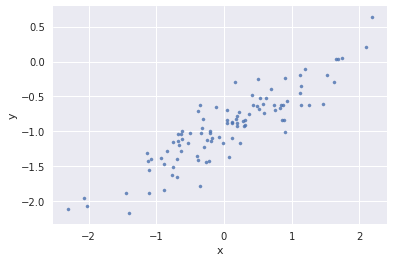

In [63]:
plt.scatter(x, y, s=10, alpha=0.8)
plt.xlabel('x')
plt.ylabel('y');

It is a linear relationship, with **x** positively correlated with **y**.

#### Exercise 13e

Fit a least squares linear model to predict **y** using **x**. Comment on the model obtained. 
How do $\hat\beta_0$ and $\hat\beta_1$ compare to $\beta_0$ and $\beta-1$?

In [64]:
model = smf.ols('y ~ x', data=X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.800
Model:                            OLS   Adj. R-squared:                  0.798
Method:                 Least Squares   F-statistic:                     391.4
Date:                Sat, 28 Apr 2018   Prob (F-statistic):           5.39e-36
Time:                        12:50:46   Log-Likelihood:                 4.1908
No. Observations:                 100   AIC:                            -4.382
Df Residuals:                      98   BIC:                            0.8288
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.9632      0.023    -40.999      0.000      -1.010      -0.917
x              0.5239      0.026     19.783      0.000       0.471       0.576
==============================================================================
Omnibus:                        0.898   Durbin-Watson:                   2.157
Prob(Omnibus):                  0.638   Jarque-Bera (JB):                0.561
Skew:                          -0.172   Prob(JB):                        0.755
Kurtosis:                       3.127   Cond. No.                         1.15
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The adjusted $R^2$ of 79.8 is good, with a F-statistic high and a very low p-value, indicating strong relationship between **x** and **y** — we can reject the null hypothesis $H_0 : \beta_i = 0$ for $i = 0, 1$. The scatter plot already landed evidence for that, this is yet another evidence.  Both coefficients are significant.

We know the actual function, $y = -1 + 0.5 x + \epsilon$, where
$$
    \beta_0 = -1,
$$
$$
    \beta_1 = 0.5.
$$
The obtained coefficients are $\hat\beta = -0.96$ and $\hat\beta_1 = 0.52$, which are very close to the real ones.

#### Exercise 13f

Display the least squares line on the scatter plot obtained in (13d). Draw the population regression line on the plot, in a diﬀerent color. Use the `legend()` command to create an appropriate legend.

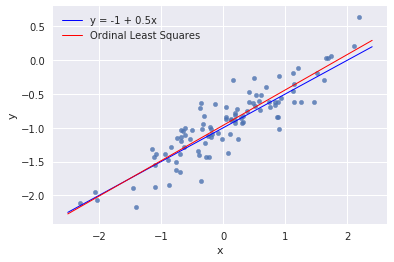

In [65]:
x_line = np.arange(-2.5, 2.5, 0.1)
y_real = -1 + 0.5*x_line
y_pred = model.predict(pd.DataFrame(dict(x=x_line)))
plt.scatter(x, y, s=20, alpha=0.8)
plt.plot(x_line, y_real, c='blue', lw=1, label='y = -1 + 0.5x')
plt.plot(x_line, y_pred, c='red', lw=1, label='Ordinal Least Squares')
plt.xlabel('x')
plt.ylabel('y')
plt.legend();

#### Exercise 13g

Now ﬁt a polynomial regression model that predicts **y** using **x** and **x²**. 
Is there evidence that the quadratic term improves the model ﬁt? Explain your answer.

In [66]:
model = smf.ols('y ~ x + np.power(x, 2)', data=X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.800
Model:                            OLS   Adj. R-squared:                  0.796
Method:                 Least Squares   F-statistic:                     193.8
Date:                Sat, 28 Apr 2018   Prob (F-statistic):           1.32e-34
Time:                        12:50:46   Log-Likelihood:                 4.2077
No. Observations:                 100   AIC:                            -2.415
Df Residuals:                      97   BIC:                             5.400
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -0.9663      0.029    -33.486      0.000      -1.024      -0.909
x                  0.5234      0.027     19.582      0.000       0.470       0.576
np.power(x, 2)     0.0039      0.021      0.181      0.856      -0.038       0.046
==============================================================================
Omnibus:                        0.893   Durbin-Watson:                   2.152
Prob(Omnibus):                  0.640   Jarque-Bera (JB):                0.552
Skew:                          -0.170   Prob(JB):                        0.759
Kurtosis:                       3.132   Cond. No.                         2.10
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

There is no evidence that **x²** improves the model, because the p-value of 0.164 
is too high, so we cannot reject the null hypothesis $H_0 : \beta_1 = 0$.

#### Exercise 13h

Repeat (13a)–(13f) after modifying the data generation process in such a way that there is *less* noise in the data. The model (3.39) should remain the same. You can do this by decreasing the variance of the normal distribution used to generate the error term $\epsilon$ in (13b). Describe your results.

In [67]:
np.random.seed(1)
x = np.random.normal(size=100)
eps = np.random.normal(scale=0.12, size=100)
y = -1 + 0.5*x + eps
X = pd.DataFrame(dict(x=x, y=y))

model = smf.ols('y ~ x', data=X).fit()
model.params

Intercept   -0.982358
x            0.511451
dtype: float64

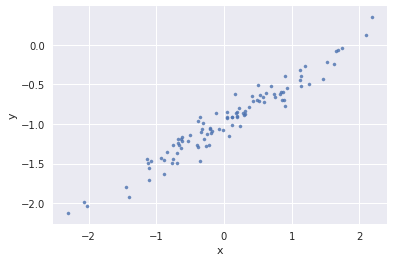

In [68]:
plt.scatter(x, y, s=10, alpha=0.8)
plt.xlabel('x')
plt.ylabel('y');

We reduced the variance of the data.

In [69]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.943
Model:                            OLS   Adj. R-squared:                  0.942
Method:                 Least Squares   F-statistic:                     1619.
Date:                Sat, 28 Apr 2018   Prob (F-statistic):           9.62e-63
Time:                        12:50:47   Log-Likelihood:                 77.588
No. Observations:                 100   AIC:                            -151.2
Df Residuals:                      98   BIC:                            -146.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.9824      0.011    -87.109      0.000      -1.005      -0.960
x              0.5115      0.013     40.238      0.000       0.486       0.537
==============================================================================
Omnibus:                        0.898   Durbin-Watson:                   2.157
Prob(Omnibus):                  0.638   Jarque-Bera (JB):                0.561
Skew:                          -0.172   Prob(JB):                        0.755
Kurtosis:                       3.127   Cond. No.                         1.15
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

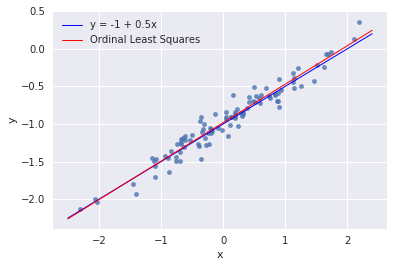

In [70]:
x_line = np.arange(-2.5, 2.5, 0.1)
y_real = -1 + 0.5*x_line
y_pred = model.predict(pd.DataFrame(dict(x=x_line)))
plt.scatter(x, y, s=20, alpha=0.8)
plt.plot(x_line, y_real, c='blue', lw=1, label='y = -1 + 0.5x')
plt.plot(x_line, y_pred, c='red', lw=1, label='Ordinal Least Squares')
plt.xlabel('x')
plt.ylabel('y')
plt.legend();

The adjusted $R²$ has increased from 79.6% to 94.2%.

The coefficient themselves are still pretty close to the real $\beta$s, as we can see in the plot above the two lines are very close to one another.

#### Exercise 13g

Repeat (13a)–(13f) after modifying the data generation process in such a way that there is *more* noise in the data. The model (3.39) should remain the same. You can do this by increasing the variance of the normal distribution used to generate the error term $\epsilon$ in (13b). Describe your results.

In [71]:
np.random.seed(1)
x = np.random.normal(size=100)
eps = np.random.normal(scale=1.0, size=100)
y = -1 + 0.5*x + eps
X = pd.DataFrame(dict(x=x, y=y))

model = smf.ols('y ~ x', data=X).fit()
model.params

Intercept   -0.852986
x            0.595427
dtype: float64

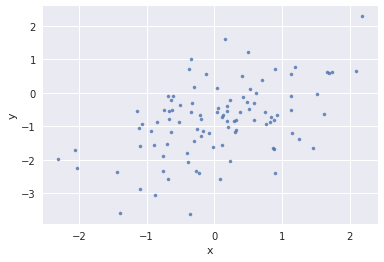

In [72]:
plt.scatter(x, y, s=10, alpha=0.8)
plt.xlabel('x')
plt.ylabel('y');

This time we’ve double the standard error from where the irreducible error
is drawn.

In [73]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.244
Model:                            OLS   Adj. R-squared:                  0.236
Method:                 Least Squares   F-statistic:                     31.60
Date:                Sat, 28 Apr 2018   Prob (F-statistic):           1.79e-07
Time:                        12:50:47   Log-Likelihood:                -134.44
No. Observations:                 100   AIC:                             272.9
Df Residuals:                      98   BIC:                             278.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.8530      0.094     -9.076      0.000      -1.039      -0.666
x              0.5954      0.106      5.621      0.000       0.385       0.806
==============================================================================
Omnibus:                        0.898   Durbin-Watson:                   2.157
Prob(Omnibus):                  0.638   Jarque-Bera (JB):                0.561
Skew:                          -0.172   Prob(JB):                        0.755
Kurtosis:                       3.127   Cond. No.                         1.15
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

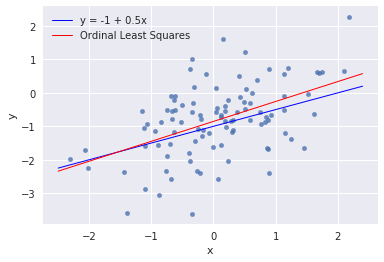

In [74]:
x_line = np.arange(-2.5, 2.5, 0.1)
y_real = -1 + 0.5*x_line
y_pred = model.predict(pd.DataFrame(dict(x=x_line)))
plt.scatter(x, y, s=20, alpha=0.8)
plt.plot(x_line, y_real, c='blue', lw=1, label='y = -1 + 0.5x')
plt.plot(x_line, y_pred, c='red', lw=1, label='Ordinal Least Squares')
plt.xlabel('x')
plt.ylabel('y')
plt.legend();

The MSE is twice as high as the MSE of the first model,
following the amount of variance we have increased.

The adjusted $R^2$ decreased from 79% to 23%.
When we reduced the error by half, the $R^2$ had increased 14 percentage points (pp). 
This time we doubled it and the $R^2$ decreased 56.2 pp.

The $\hat\beta$s are slightly different, and the plot above shows the two lines slightly more separate.

#### Exercise 13j

What are the conﬁdence intervals for $\beta_0$ and $\beta_1$ based on the original data set, the noisier data set, and the less noisy data set? Comment on your results.

In [75]:
def conf_int_ds(sd):
    """sd: noise level"""
    np.random.seed(1)
    x = np.random.normal(size=100)
    eps = np.random.normal(scale=sd, size=100)
    y = -1 + 0.5*x + eps
    X = pd.DataFrame(dict(x=x, y=y))
    model = smf.ols('y ~ x', data=X).fit()
    print(f'sd = {sd}')
    print(model.conf_int())
    
for sd in [0.25, 0.5, 0.12]:
    conf_int_ds(sd)

sd = 0.25
                  0         1
Intercept -1.009870 -0.916623
x          0.471307  0.576407
sd = 0.5
                  0         1
Intercept -1.019741 -0.833246
x          0.442613  0.652814
sd = 0.12
                  0         1
Intercept -1.004738 -0.959979
x          0.486227  0.536675


The confidence intervals of the coefficients increase together with the irreducible error $\epsilon$ we add to the data.  This means the less noise we have on the data, the more tight the confidence intervals become.

### Exercise 14

This problem focuses on the collinearity problem.

In [76]:
np.random.seed(1)
x1 = np.random.uniform(size=100)
x2 = 0.5*x1 + np.random.normal(size=100)/10
y = 2 + 2*x1 + 0.3*x2 + np.random.normal(size=100)

#### Exercise 14a

The last line corresponds to creating a linear model in which **y** is a function of **x1** and **x2**. Write out the form of the linear model. What are the regression coeﬃcients?

The linear model is
$$y = f(x) + \epsilon,$$
$$f(x) = 2 + 2 x_1 + 0.3 x_2,$$
where $\epsilon \sim N(0, 1)$. The regression coefficients are 
$$\beta_0 = 2,$$
$$\beta_1 = 2,$$
$$\beta_2 = 0.3.$$

#### Exercise 14b

What is the correlation between **x1** and **x2**? Create a scatterplot displaying the relationship between the variables.

In [77]:
np.corrcoef(x1, x2)

array([[1.        , 0.83905962],
       [0.83905962, 1.        ]])

**x1** and **x2** are highly correlated.

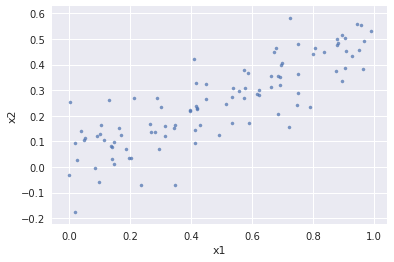

In [78]:
plt.scatter(x1, x2, s=10, alpha=0.7)
plt.xlabel('x1')
plt.ylabel('x2');

#### Exercise 14c

Using this data, ﬁt a least squares regression to predict **y** using **x1** and **x2**. Describe the results obtained. What are $\hat\beta_0$, $\hat\beta_1$, and $\hat\beta_2$? How do these relate to the true $\beta_0$, $\beta_1$, and $\beta_2$? Can you reject the null hypothesis $H_0 : \beta_1 = 0$? How about the null hypothesis $H_0 : \beta_2 = 0$?

In [79]:
X = pd.DataFrame(dict(x1=x1, x2=x2, y=y))
model = smf.ols('y ~ x1 + x2', data=X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.261
Model:                            OLS   Adj. R-squared:                  0.245
Method:                 Least Squares   F-statistic:                     17.09
Date:                Sat, 28 Apr 2018   Prob (F-statistic):           4.40e-07
Time:                        12:50:48   Log-Likelihood:                -142.34
No. Observations:                 100   AIC:                             290.7
Df Residuals:                      97   BIC:                             298.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.1893      0.199     11.021      0.000       1.795       2.584
x1             0.7046      0.637      1.107      0.271      -0.559       1.968
x2             2.5024      1.140      2.194      0.031       0.239       4.766
==============================================================================
Omnibus:                        0.607   Durbin-Watson:                   2.111
Prob(Omnibus):                  0.738   Jarque-Bera (JB):                0.577
Skew:                          -0.179   Prob(JB):                        0.749
Kurtosis:                       2.900   Cond. No.                         14.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The coefficients are $\hat\beta_0 = 2.19, \hat\beta_1 = 0.7, \hat\beta_2 = 2.5$.
The intercept $\hat\beta_0$ is close to the real $\beta_0$, but the others have a high standard error. The null hypothesis $H_0 : \beta_1 = 0$ has a p-value of 27.1%, which is suggests that null hypothesis can be rejected; however, the null hypothesis $H_0 : \beta_2 = 0$ has a p-value of 3.1%, so it cannot be rejected.

#### Exercise 14d

Now ﬁt a least squares regression to predict **y** using only **x1**. Comment on your results. Can you reject the null hypothesis $H_0 : \beta_1 = 0$?

In [80]:
model = smf.ols('y ~ x1', data=X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.224
Model:                            OLS   Adj. R-squared:                  0.216
Method:                 Least Squares   F-statistic:                     28.26
Date:                Sat, 28 Apr 2018   Prob (F-statistic):           6.68e-07
Time:                        12:50:48   Log-Likelihood:                -144.76
No. Observations:                 100   AIC:                             293.5
Df Residuals:                      98   BIC:                             298.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.2486      0.201     11.209      0.000       1.850       2.647
x1             1.8770      0.353      5.316      0.000       1.176       2.578
==============================================================================
Omnibus:                        0.292   Durbin-Watson:                   2.123
Prob(Omnibus):                  0.864   Jarque-Bera (JB):                0.468
Skew:                          -0.003   Prob(JB):                        0.791
Kurtosis:                       2.665   Cond. No.                         4.26
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The MSE and the adjusted $R²$ remain about the same; the F-statistic, on the other hand, increased from 17 to 28.  Without **x2**, the null hypothesis $H_0 : \beta_1 = 0$ can be safely rejected.  Furthermore, the standard error of **x1** coefficient decreased a lot from 0.637 to 0.353.

#### Exercise 14e

Now ﬁt a least squares regression to predict **y** using only **x2**. Comment on your results. Can you reject the null hypothesis $H_0 : \beta_1 = 0$?

In [81]:
model = smf.ols('y ~ x2', data=X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.251
Model:                            OLS   Adj. R-squared:                  0.244
Method:                 Least Squares   F-statistic:                     32.87
Date:                Sat, 28 Apr 2018   Prob (F-statistic):           1.09e-07
Time:                        12:50:48   Log-Likelihood:                -142.97
No. Observations:                 100   AIC:                             289.9
Df Residuals:                      98   BIC:                             295.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.2655      0.187     12.145      0.000       1.895       2.636
x2             3.5613      0.621      5.733      0.000       2.329       4.794
==============================================================================
Omnibus:                        0.857   Durbin-Watson:                   2.117
Prob(Omnibus):                  0.651   Jarque-Bera (JB):                0.746
Skew:                          -0.210   Prob(JB):                        0.689
Kurtosis:                       2.946   Cond. No.                         6.48
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The F-statistic, increased from 17.1 to 32.87, and it is higher than **x1**’s 28.  Without **x1**, the null hypothesis $H_0 : \beta_1 = 0$ can be safely rejected.

#### Exercise 14f

Do the results obtained in (14c)–(14e) contradict each other? Explain your answer.

They do not contradict. This is due to the collinearity of **x1** and **x2**. When they are both used together, the individual results may be misleading regarding of how each predictor is related to the dependent variable **y**.  One consequence of collinearity is also a high standard error for each predictor coefficient $\hat\beta$ when they are used together.  This standard error is used for the t-statistic; thus, a high standard error lead to a failure when trying to reject a null hypothesis that the coefficient is zero.

#### Exercise 14g

Now suppose we obtain one additional observation, which was unfortunately mismeasured.

In [82]:
X1 = pd.concat([
    X,
    pd.DataFrame(dict(x1=0.1, x2=0.8, y=6), index=[100])
])

Re-ﬁt the linear models from (c) to (e) using this new data. What eﬀect does this new observation have on the each of the models? In each model, is this observation an outlier? A high-leverage point? Both? Explain your answers.

In [83]:
model_both = smf.ols('y ~ x1 + x2', data=X1).fit()
model_x1 = smf.ols('y ~ x1', data=X1).fit()
model_x2 = smf.ols('y ~ x2', data=X1).fit()
print(model_both.summary())
print(model_x1.summary())
print(model_x2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.289
Model:                            OLS   Adj. R-squared:                  0.275
Method:                 Least Squares   F-statistic:                     19.92
Date:                Sat, 28 Apr 2018   Prob (F-statistic):           5.51e-08
Time:                        12:50:48   Log-Likelihood:                -144.15
No. Observations:                 101   AIC:                             294.3
Df Residuals:                      98   BIC:                             302.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.1996      0.199     11.041      0.0

The model with both predictors has **x1**’s t-statistic p-value shifted to a large value that we cannot reject the respective null hypothesis. The model with **x2** had the best fit so far. Let’s use the diagnostic plots for each one.

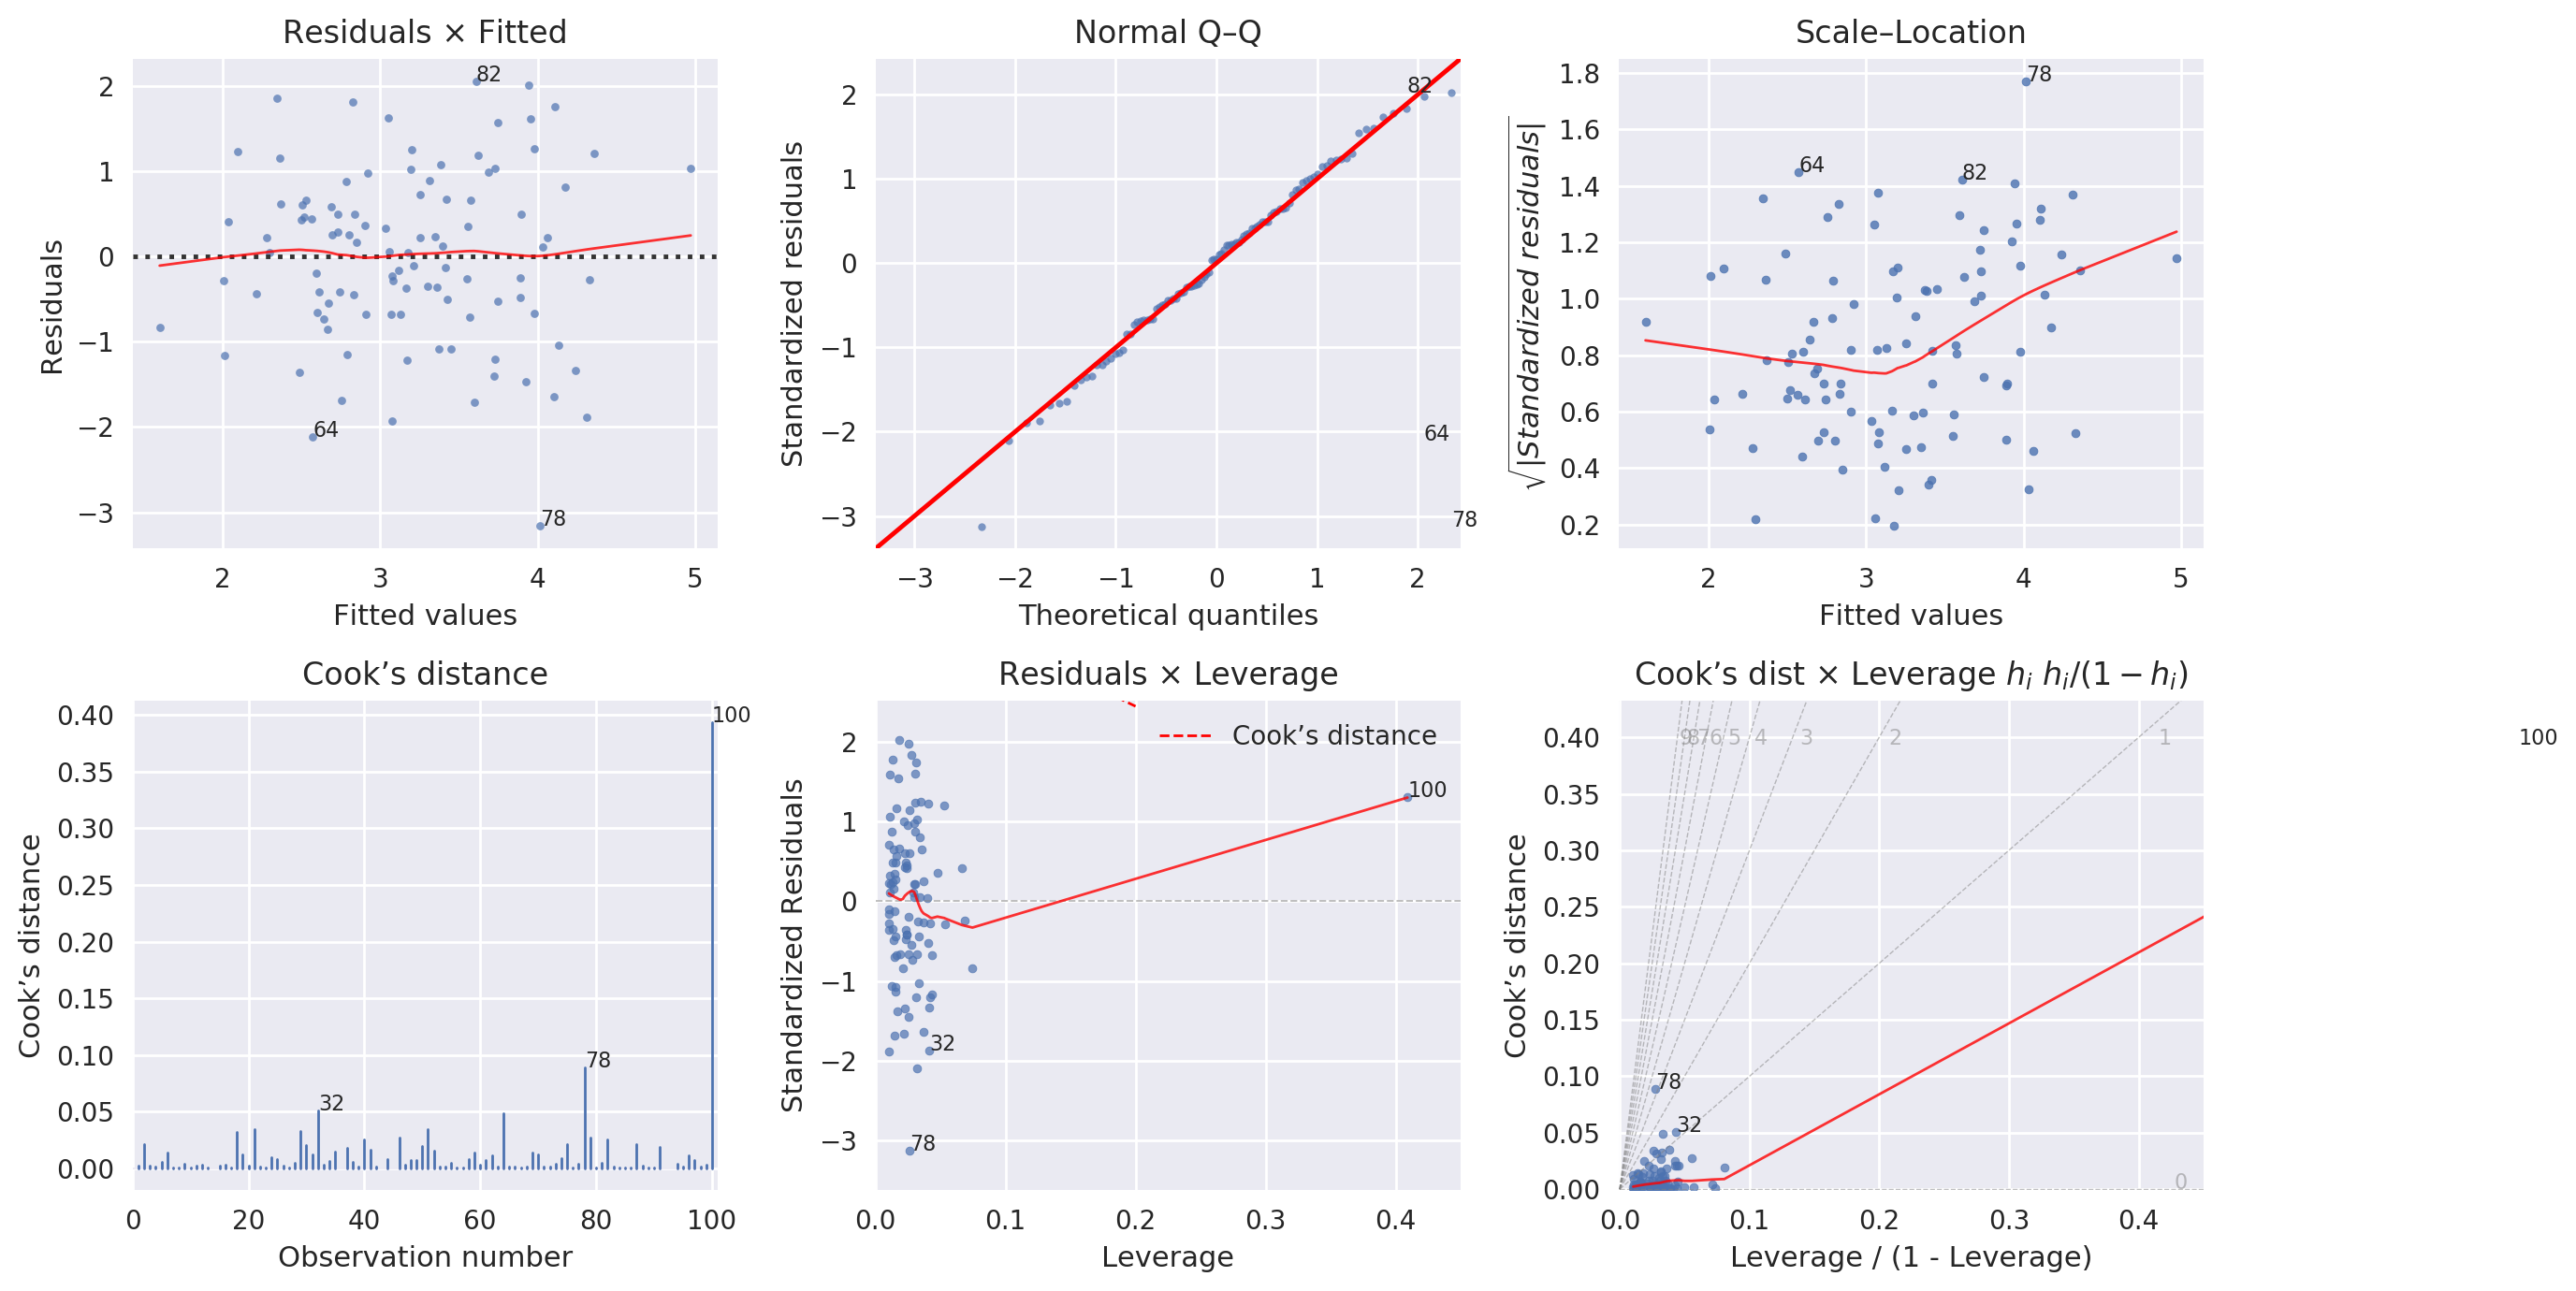

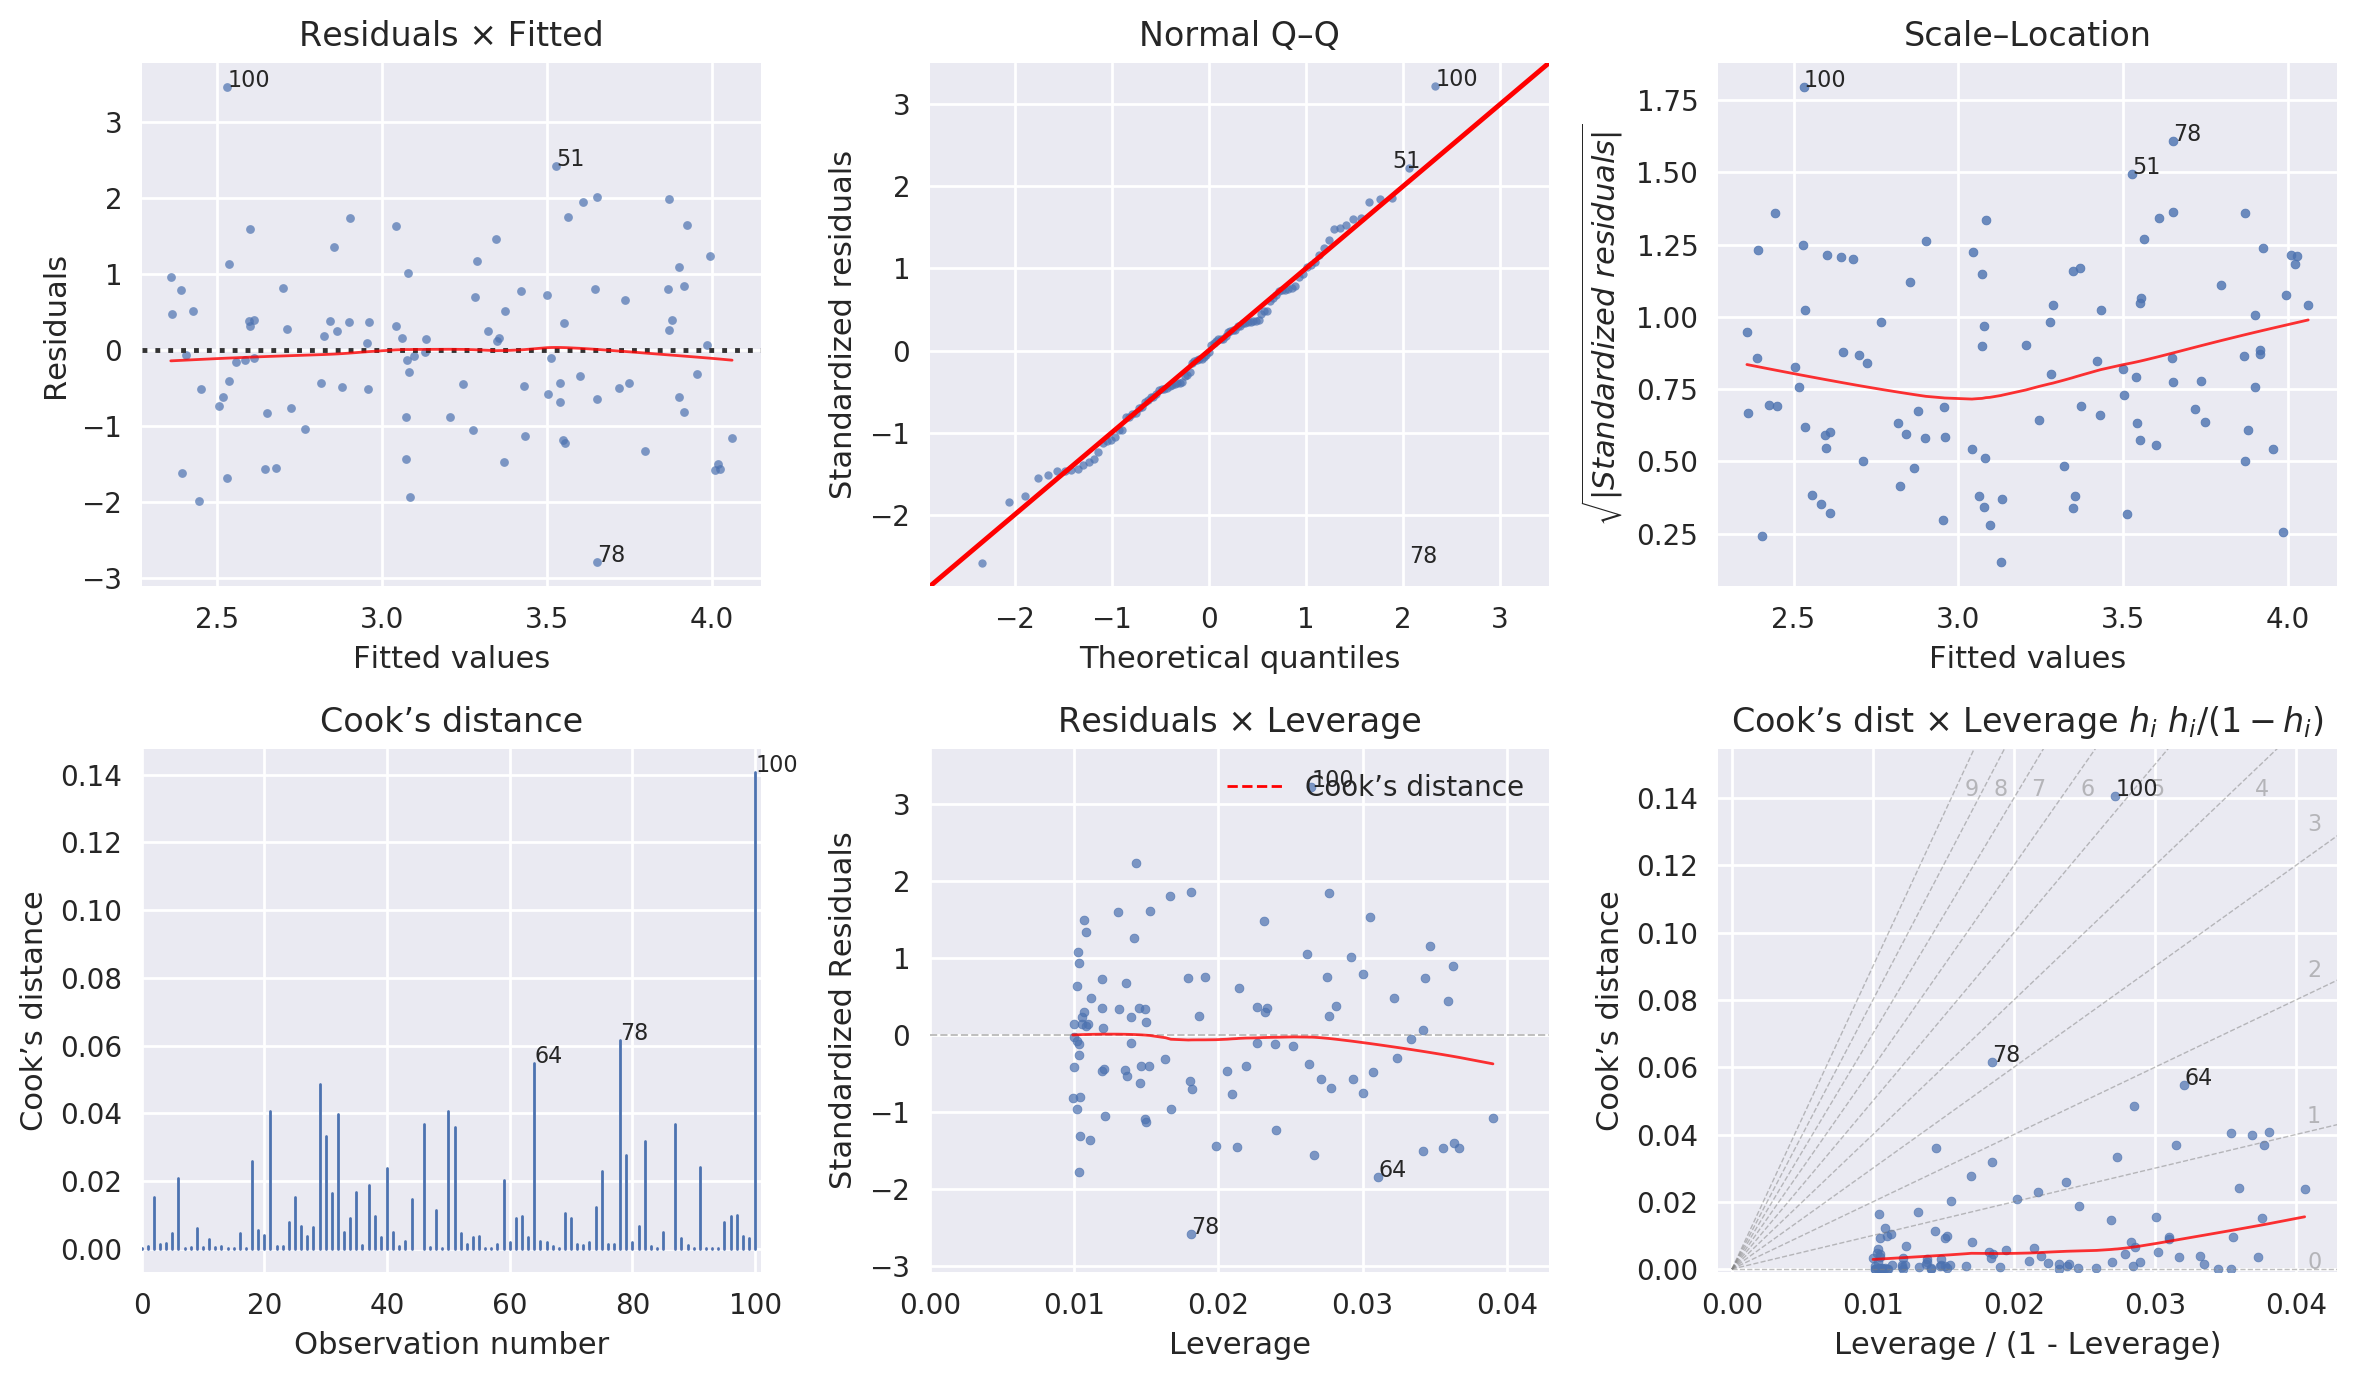

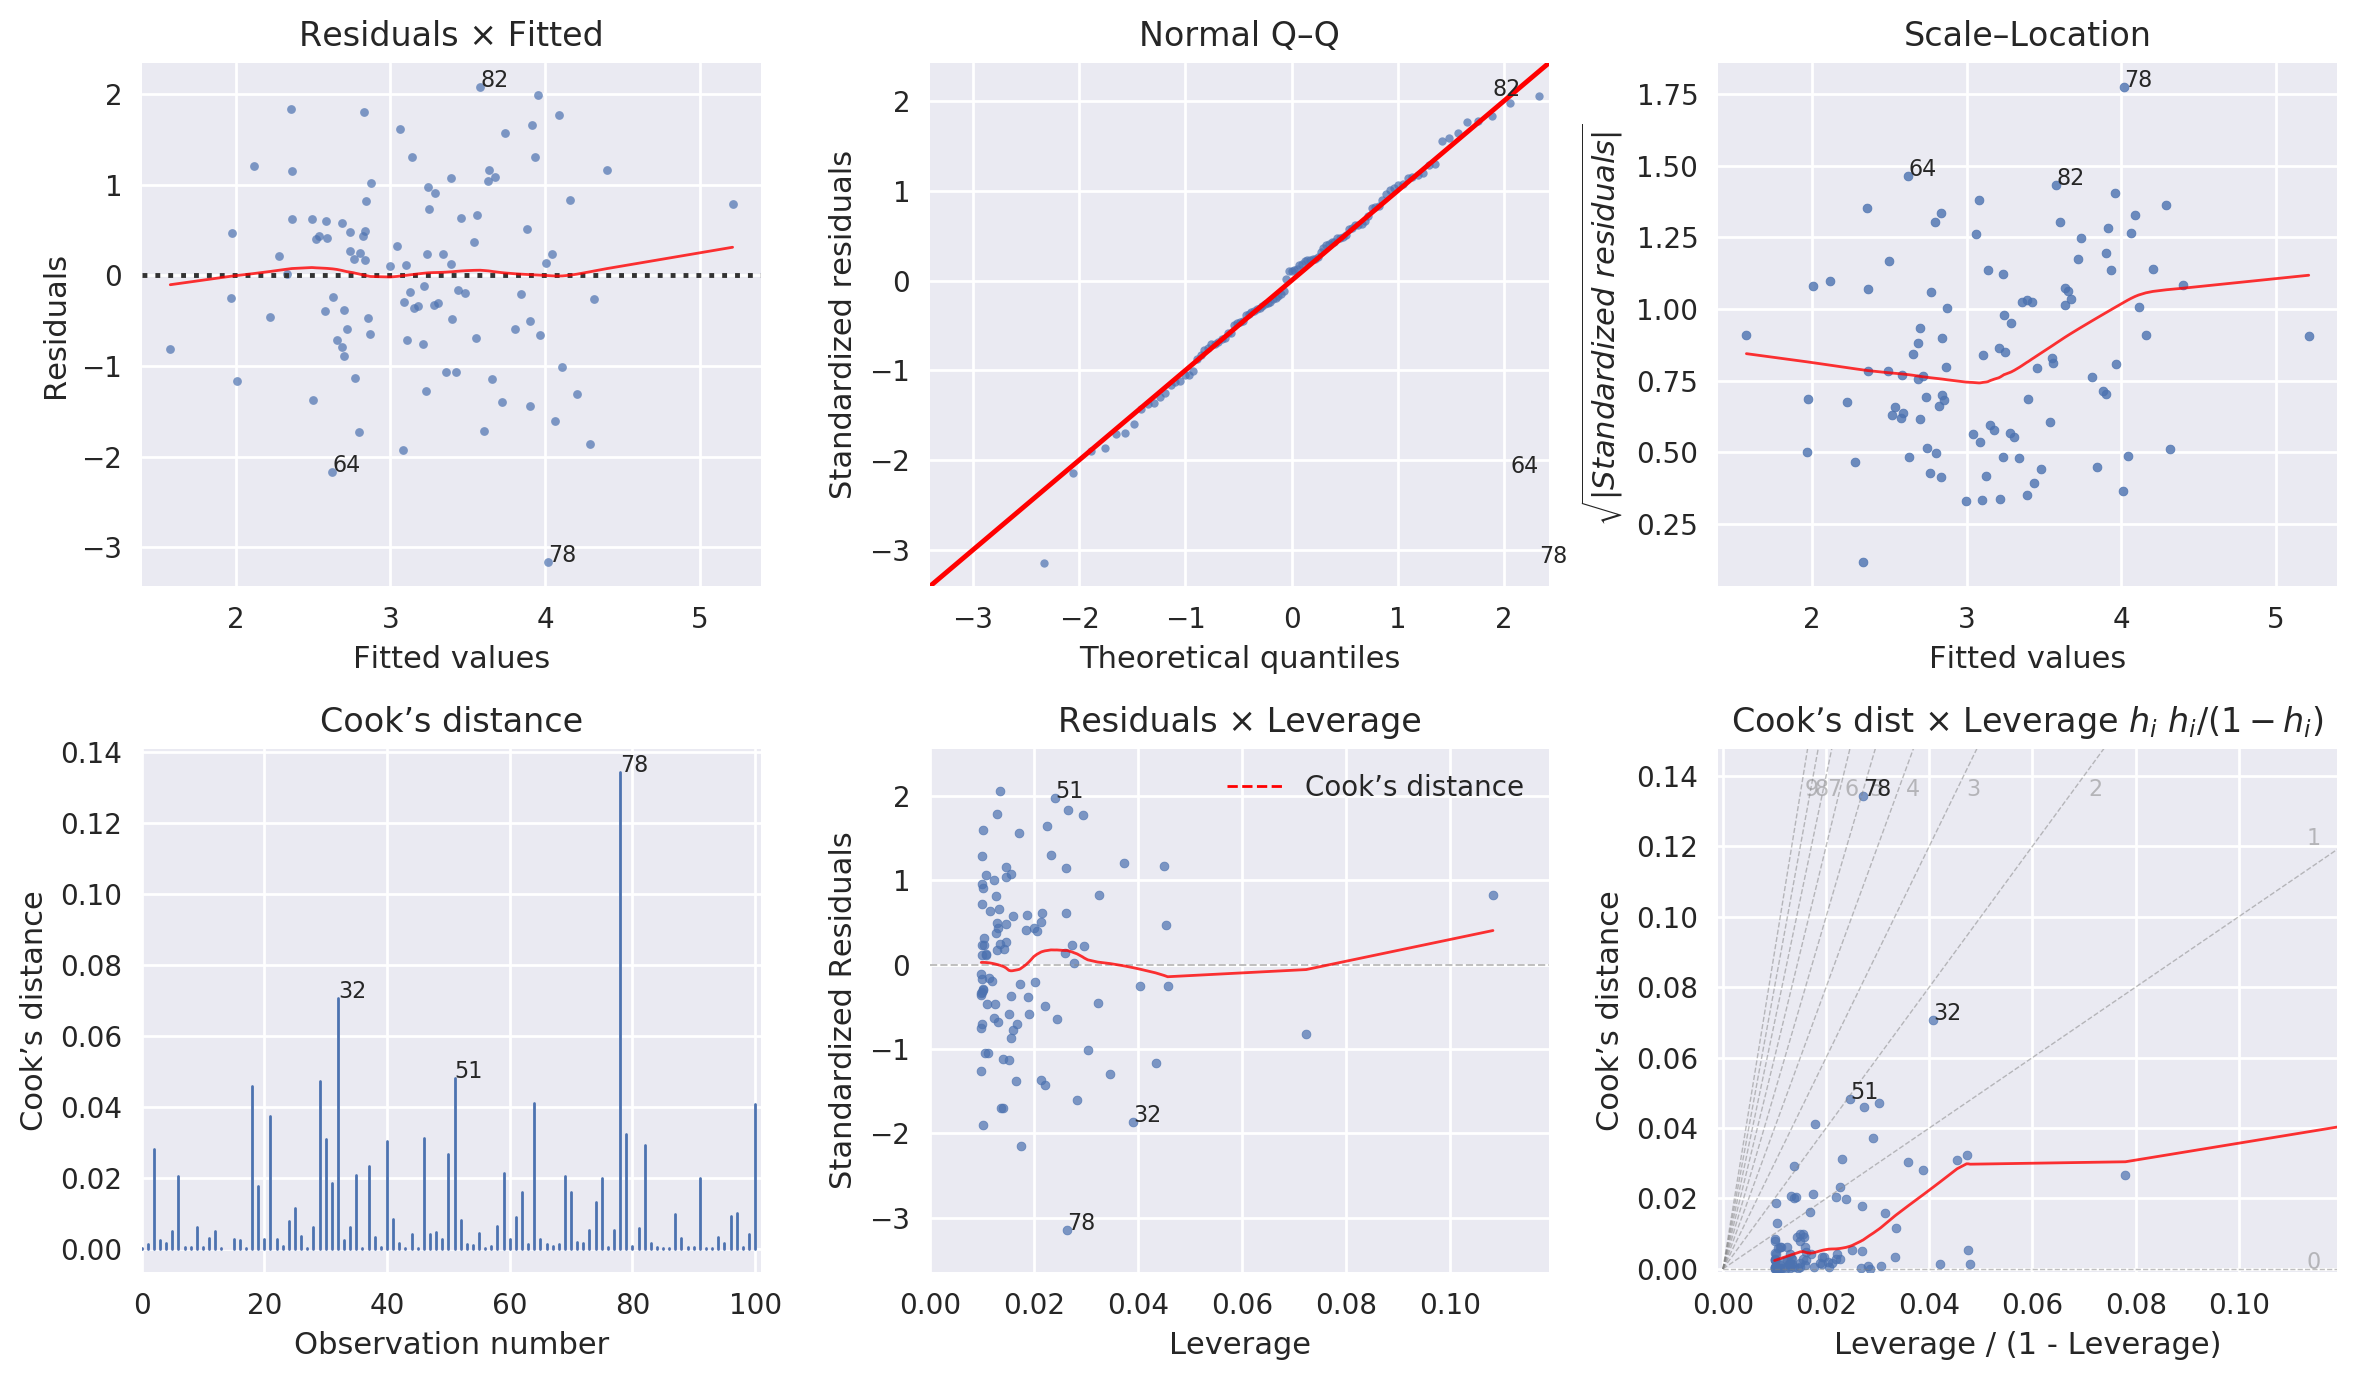

In [84]:
diagnostics.lm_plot(model_both, X1.y)
diagnostics.lm_plot(model_x1, X1.y)
diagnostics.lm_plot(model_x2, X1.y)

The new observation severely affects the first model, strongly the second, and
significantly the third model.

- In the first model, $y \sim x_1 + x_2$, the observation is **a high-leverage point**
- In the second model, $y \sim x_1$, the observation is **an outlier**
- In the third model, $y \sim x_2$, the observation is **a high-leverage point**

### Exercise 15

This problem involves the **Boston** data set, which we saw in the lab for this chapter. We will now try to predict per capita crime rate using the other variables in this data set. In other words, per capita crime rate is the response, and the other variables are the predictors.

In [85]:
Boston = pd.read_csv('data/Boston.csv', index_col=0)
Boston.head()

crim    zn  indus  chas    nox     rm   age     dis  rad  tax  ptratio  \
1  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
2  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
3  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
4  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
5  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

    black  lstat  medv  
1  396.90   4.98  24.0  
2  396.90   9.14  21.6  
3  392.83   4.03  34.7  
4  394.63   2.94  33.4  
5  396.90   5.33  36.2

#### Exercise 15a

For each predictor, ﬁt a simple linear regression model to predict the response. Describe your results. In which of the models is there a statistically signiﬁcant association between the predictor and the response? Create some plots to back up your assertions.

In [86]:
def fit_model(predictor):
    model = smf.ols(f'crim ~ {predictor}', data=Boston).fit()
    print(model.params)
    print(f'F-statistic: {model.fvalue:.1f}, p: {model.f_pvalue:.5f}')
    print()

features = [col for col in Boston.columns if col not in ['crim']]
for feature in features:
    fit_model(feature)

Intercept    4.453694
zn          -0.073935
dtype: float64
F-statistic: 21.1, p: 0.00001

Intercept   -2.063743
indus        0.509776
dtype: float64
F-statistic: 99.8, p: 0.00000

Intercept    3.744447
chas        -1.892777
dtype: float64
F-statistic: 1.6, p: 0.20943

Intercept   -13.719882
nox          31.248531
dtype: float64
F-statistic: 108.6, p: 0.00000

Intercept    20.481804
rm           -2.684051
dtype: float64
F-statistic: 25.5, p: 0.00000

Intercept   -3.777906
age          0.107786
dtype: float64
F-statistic: 71.6, p: 0.00000

Intercept    9.499262
dis         -1.550902
dtype: float64
F-statistic: 84.9, p: 0.00000

Intercept   -2.287159
rad          0.617911
dtype: float64
F-statistic: 323.9, p: 0.00000

Intercept   -8.528369
tax          0.029742
dtype: float64
F-statistic: 259.2, p: 0.00000

Intercept   -17.646933
ptratio       1.151983
dtype: float64
F-statistic: 46.3, p: 0.00000

Intercept    16.553529
black        -0.036280
dtype: float64
F-statistic: 87.7, p: 0.00000



Separately, we can reject the null hypothesis of $H_0 : \beta = 0$ for all predictors except **chas** .

#### Exercise 15b

Fit a multiple regression model to predict the response using all of the predictors. Describe your results. For which predictors can we reject the null hypothesis $H_0 : \beta_j = 0$?

In [87]:
features = '+'.join([col for col in Boston.columns if col not in ['crim']])

model = smf.ols(f'crim ~ {features}', data=Boston).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   crim   R-squared:                       0.454
Model:                            OLS   Adj. R-squared:                  0.440
Method:                 Least Squares   F-statistic:                     31.47
Date:                Sat, 28 Apr 2018   Prob (F-statistic):           1.57e-56
Time:                        12:50:55   Log-Likelihood:                -1653.3
No. Observations:                 506   AIC:                             3335.
Df Residuals:                     492   BIC:                             3394.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     17.0332      7.235      2.354      0.019       2.818      31.248
zn             0.0449      0.019      2.394      0.017       0.008       0.082
indus         -0.0639      0.083     -0.766      0.444      -0.228       0.100
chas          -0.7491      1.180     -0.635      0.526      -3.068       1.570
nox          -10.3135      5.276     -1.955      0.051     -20.679       0.052
rm             0.4301      0.613      0.702      0.483      -0.774       1.634
age            0.0015      0.018      0.081      0.935      -0.034       0.037
dis           -0.9872      0.282     -3.503      0.001      -1.541      -0.433
rad            0.5882      0.088      6.680      0.000       0.415       0.761
tax           -0.0038      0.005     -0.733      0.464      -0.014       0.006
ptratio       -0.2711      0.186     -1.454      0.147      -0.637       0.095
black         -0.0075      0.004     -2.052      0.041      -0.015      -0.000
lstat          0.1262      0.076      1.667      0.096      -0.023       0.275
medv          -0.1989      0.061     -3.287      0.001      -0.318      -0.080
==============================================================================
Omnibus:                      666.613   Durbin-Watson:                   1.519
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            84887.625
Skew:                           6.617   Prob(JB):                         0.00
Kurtosis:                      65.058   Cond. No.                     1.58e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.58e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

We can reject the null hypothesis for **zn**, **dis**, **rad**, **black**, and **medv**.

#### Exercise 15c

How do your results from (a) compare to your results from (b)? Create a plot displaying the univariate regression coeﬃcients from (a) on the x-axis, and the multiple regression coeﬃcients from (b) on the y-axis. That is, each predictor is displayed as a single point in the plot. Its coeﬃcient in a simple linear regression model is shown on the x-axis, and its coeﬃcient estimate in the multiple linear regression model is shown on the y-axis.

Text(0,0.5,'Multiple Regression Coefficient')

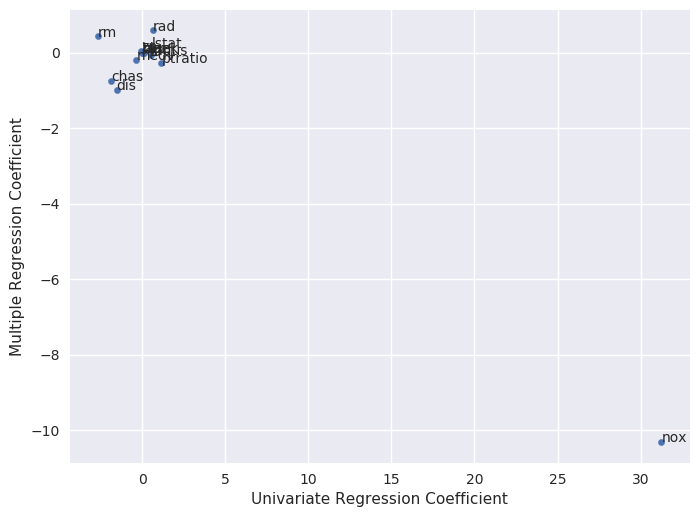

In [88]:
def univ_coef(predictor):
    """Univariate regression coefficient"""
    model = smf.ols(f'crim ~ {predictor}', data=Boston).fit()
    return pd.DataFrame(dict(predictor=predictor, univ=model.params[1]), index=[predictor])

# Univariate regression coefficients
features = [col for col in Boston.columns if col not in ['crim']]
univ = pd.concat([univ_coef(feature) for feature in features])

# Multiple regression coefficients
features = '+'.join([col for col in Boston.columns if col not in ['crim']])
model = smf.ols(f'crim ~ {features}', data=Boston).fit()
mlr = pd.DataFrame(model.params, columns=['mlr'])

coef = pd.concat([univ, mlr], axis=1).drop('Intercept')

fig, ax = plt.subplots(1, figsize=(8, 6), dpi=100)
ax.scatter(coef.univ, coef.mlr, s=20)
for name, row in coef.iterrows():
    ax.text(row.univ, row.mlr, row.predictor)
ax.set_xlabel('Univariate Regression Coefficient')
ax.set_ylabel('Multiple Regression Coefficient')

Particularly, **nox** has a coefficient 31.2 on $y \sim NO_x$, but its coefficient
on the multivariate model is -10.3.

This and the other differences are because of differences that affect how we 
interpret the univariate and multivariate models.  In univariate, the slope, 
$\beta_1$ is interpreted as how much a change in the predictor affects the 
dependent variable.  In the multivariate cases, this interpretation is done
by holding fixed all the other predictors.  Moreover, when we have collinearity,
only one of the predictors may be used, while the other can be near zero.

Let’s see the correlation matrix:

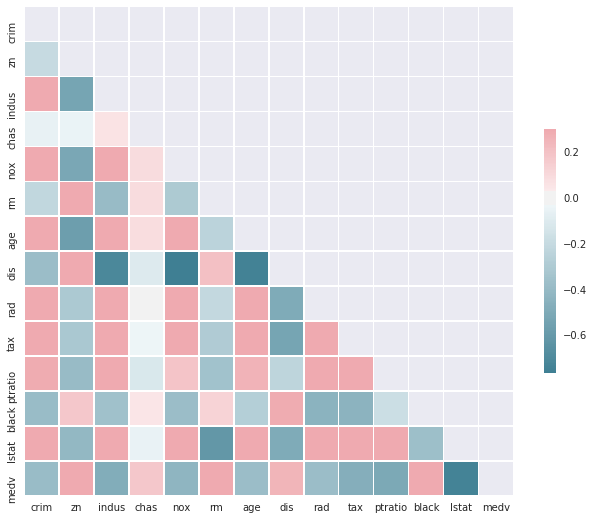

In [89]:
corr = Boston.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})


For instance, we know **nox** coefficient in the univariate model is 31.2. If we add **nox** and its three positively correlated
predictors, **tax**, **rad**, and **data**, we get these coefficients:

In [90]:
model = smf.ols('crim ~ nox + age + tax + rad', data=Boston).fit()
model.params

Intercept   -3.931157
nox         -0.457051
age          0.025801
tax          0.001900
rad          0.550122
dtype: float64

#### Exercise 15d

Is there evidence of non-linear association between any of the predictors and the response? To answer this question, for each predictor $X$, ﬁt a model of the form
$$
    y = \beta_0 + \beta_1 X + \beta_2 X^2 + \beta_3 X^3 + \epsilon.
$$

In [91]:
for feature in Boston.columns:
    if feature == 'crim':
        continue
    transf = [f'np.power({feature}, {i})' for i in range(1, 4)]
    transforms = '+'.join(transf)
    model = smf.ols(f'crim ~ {feature} + {transforms}', data=Boston).fit()
    print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   crim   R-squared:                       0.058
Model:                            OLS   Adj. R-squared:                  0.053
Method:                 Least Squares   F-statistic:                     10.35
Date:                Sat, 28 Apr 2018   Prob (F-statistic):           1.28e-06
Time:                        12:50:56   Log-Likelihood:                -1791.2
No. Observations:                 506   AIC:                             3590.
Df Residuals:                     502   BIC:                             3607.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           4.8461      0.433     